# TRABAJO JUGADORES NBA

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from google.colab import files
uploaded = files.upload()

Saving nba_2022-23_all_stats_with_salary.csv to nba_2022-23_all_stats_with_salary.csv


In [5]:
df = pd.read_csv("nba_2022-23_all_stats_with_salary.csv")
df_original=pd.read_csv("nba_2022-23_all_stats_with_salary.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
pd.set_option('display.max_columns', None)  # muestra todas las columnas
pd.set_option('display.width', 1000)
df.head()

Player Name    Salary Position  Age     Team  GP  GS    MP    FG   FGA    FG%   3P   3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Total Minutes   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP
0      Stephen Curry  48070014       PG   34      GSW  56  56  34.7  10.0  20.2  0.493  4.9  11.4  0.427  5.1   8.8  0.579  0.614  4.6  5.0  0.915  0.7  5.4  6.1  6.3  0.9  0.4  3.2  2.1  29.4           1941  24.1  0.656  0.564  0.248   2.3  16.8   9.7  30.0   1.3   0.9  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7
1          John Wall  47345760       PG   32      LAC  34   3  22.2   4.1   9.9  0.408  1.0   3.2  0.303  3.1   6.7  0.459  0.457  2.3  3.3  0.681  0.4  2.3  2.7  5.2  0.8  0.4  2.4  1.7  11.4            755  13.6  0.498  0.322  0.334   2.1  11.4   6.8  35.3   1.8   1.4  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1
2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24  29.1   5.9  13.6  0.436  1.2   3.9  0.311  4.7   9.7  0.487  0.481  2.8  4.3  0.656  1.2  4.6  5.8  7.5  1.0  0.5  3.5  2.2  15.9           2126  16.1  0.513  0.289  0.317   4.7  16.5  10.8  38.6   1.7   1.3  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2
3       LeBron James  44474988       PF   38      LAL  55  54  35.5  11.1  22.2  0.500  2.2   6.9  0.321  8.9  15.3  0.580  0.549  4.6  5.9  0.768  1.2  7.1  8.3  6.8  0.9  0.6  3.2  1.6  28.9           1954  23.9  0.583  0.309  0.268   3.7  20.8  12.5  33.5   1.2   1.4  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0
4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47  35.6  10.3  18.3  0.560  2.0   4.9  0.404  8.3  13.4  0.617  0.614  6.5  7.1  0.919  0.4  6.3  6.7  5.0  0.7  1.4  3.3  2.1  29.1           1672  25.9  0.677  0.267  0.387   1.2  19.5  10.5  24.5   1.0   3.4  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9

In [7]:
df.shape

(467, 51)

- Player Name: Nombre completo del jugador.

- Salary: Salario del jugador en la temporada (en dólares).

- Position: Posición en el campo (PG, SG, SF, PF, C).

- Age: Edad del jugador en años.

- Team: Equipo en el que juega el jugador (abreviatura).

- GP: Partidos jugados (Games Played).

- GS: Partidos como titular (Games Started).

- MP: Minutos promedio jugados por partido.

- FG: Tiros de campo anotados por partido.

- FGA: Tiros de campo intentados por partido.

- FG%: Porcentaje de acierto en tiros de campo.

- 3P: Triples anotados por partido.

- 3PA: Triples intentados por partido.

- 3P%: Porcentaje de acierto en triples.

- 2P: Tiros de 2 puntos anotados por partido.

- 2PA: Tiros de 2 puntos intentados por partido.

- 2P%: Porcentaje de acierto en tiros de 2 puntos.

- eFG%: Porcentaje de tiro efectivo (ajustado por triples).

- FT: Tiros libres anotados por partido.

- FTA: Tiros libres intentados por partido.

- FT%: Porcentaje de acierto en tiros libres.

- ORB: Rebotes ofensivos por partido.

- DRB: Rebotes defensivos por partido.

- TRB: Rebotes totales por partido.

- AST: Asistencias por partido.

- STL: Robos por partido.

- BLK: Tapones por partido.

- TOV: Pérdidas de balón por partido.

- PF: Faltas personales por partido.

- PTS: Puntos promedio por partido.

- Total Minutes: Minutos totales jugados en la temporada.

- PER: Player Efficiency Rating (índice de eficiencia global).

- TS%: True Shooting Percentage (eficiencia real de tiro considerando 2P, 3P y TL).

- 3PAr: Proporción de tiros de 3 respecto al total de tiros de campo.

- FTr: Proporción de tiros libres respecto a tiros de campo intentados.

- ORB%: Porcentaje estimado de rebotes ofensivos capturados mientras está en cancha.

- DRB%: Porcentaje estimado de rebotes defensivos capturados mientras está en cancha.

- TRB%: Porcentaje estimado de rebotes totales capturados mientras está en cancha.

- AST%: Porcentaje estimado de asistencias dadas mientras está en cancha.

- STL%: Porcentaje estimado de robos generados mientras está en cancha.

- BLK%: Porcentaje estimado de tiros bloqueados mientras está en cancha.

- TOV%: Porcentaje de jugadas que terminan en pérdida de balón.

- USG%: Usage Percentage (proporción de jugadas ofensivas en las que participa el jugador).

- OWS: Win Shares ofensivas (victorias estimadas generadas en ataque).

- DWS: Win Shares defensivas (victorias estimadas generadas en defensa).

- WS: Win Shares totales (OWS + DWS).

- WS/48: Win Shares por 48 minutos jugados (normaliza la contribución).

- OBPM: Offensive Box Plus/Minus (impacto ofensivo por encima del promedio).

- DBPM: Defensive Box Plus/Minus (impacto defensivo por encima del promedio).

- BPM: Box Plus/Minus total (suma de OBPM y DBPM).

- VORP: Value Over Replacement Player (valor añadido respecto a un jugador de reemplazo).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Name    467 non-null    object 
 1   Salary         467 non-null    int64  
 2   Position       467 non-null    object 
 3   Age            467 non-null    int64  
 4   Team           467 non-null    object 
 5   GP             467 non-null    int64  
 6   GS             467 non-null    int64  
 7   MP             467 non-null    float64
 8   FG             467 non-null    float64
 9   FGA            467 non-null    float64
 10  FG%            466 non-null    float64
 11  3P             467 non-null    float64
 12  3PA            467 non-null    float64
 13  3P%            454 non-null    float64
 14  2P             467 non-null    float64
 15  2PA            467 non-null    float64
 16  2P%            463 non-null    float64
 17  eFG%           466 non-null    float64
 18  FT        

In [9]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols].agg(['min', 'max'])

Salary  Age  GP  GS    MP    FG   FGA  FG%   3P   3PA  3P%    2P   2PA  2P%  eFG%    FT   FTA  FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  Total Minutes   PER    TS%  3PAr  FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%   TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP
min      5849   19   1   0   1.8   0.0   0.0  0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0              2 -20.9  0.000   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   5.1 -1.9  0.0  -1.6 -0.517 -22.5 -10.4 -26.5  -1.3
max  48070014   42  83  83  41.0  11.2  22.2  1.0  4.9  11.4  1.0  10.5  17.8  1.0   1.0  10.0  12.3  1.0  5.1  9.6  12.5  10.7  3.0  2.5  4.1  5.0  33.1           2963  65.6  1.064   1.0  2.0  28.8  55.4  29.6  47.6  24.2  44.1  100.0  52.5  9.6  4.8  12.6  0.626  17.0  32.7  48.6   6.4

En el caso de todas las variables numéricas, debemos comprar que esten en los rangos esperados, por ejemplo los porcentajes deberán estar entre 0 y 1, las estadísticas de puntos, rebotes, minutos, etc. no podrán ser negativas, el número de partidos no podrá ser superior a 83. Hagamos hincapié en las estadísitcas en las que el mínimo es negativo. Esto ocurre para PER, OWS, WS, WS/48, OBPM, DBPM, BPM y VORP, en todos los casos miden eficiencia, victorias estimadas o impacto, por lo tanto podrán ser estadísticas negativas y no es nada que nos deba preocupar.

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_values = {col: df[col].nunique() for col in categorical_cols}
categorical_values

{'Player Name': 467, 'Position': 9, 'Team': 75}

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_values = {col: df[col].unique().tolist() for col in categorical_cols[[1]]}
categorical_values

{'Position': ['PG', 'PF', 'SG', 'SF', 'PG-SG', 'C', 'SF-SG', 'SG-PG', 'SF-PF']}

En el caso de las variables categóricas esperaremos tener tantos nombres como filas (se cumple), vemos que hay 9 posiciones diferentes y en el tema de equipos deberíamos esperar 30 y vemos que hay muchos más, 75, esto se debe a que hay jugadores que cambian de equipo a mitad de temporada y en esos casos ponen los dos equipos.

## Tratamiento de datos faltantes.
El primer paso sería ver si hay una explicación para que estos datos sean ausentes, en este caso, como no sabemos la procedencia no podremos tenerlo en cuenta para el tratamiento.

In [12]:
print(df.isna().sum())

Player Name       0
Salary            0
Position          0
Age               0
Team              0
GP                0
GS                0
MP                0
FG                0
FGA               0
FG%               1
3P                0
3PA               0
3P%              13
2P                0
2PA               0
2P%               4
eFG%              1
FT                0
FTA               0
FT%              23
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Total Minutes     0
PER               0
TS%               1
3PAr              1
FTr               1
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              0
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0
BPM               0


In [13]:
na_rows = df[df.isna().any(axis=1)]
print(na_rows)

           Player Name    Salary Position  Age     Team  GP  GS    MP   FG  FGA    FG%   3P  3PA    3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Total Minutes   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%   TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP
75   Mitchell Robinson  17045454        C   24      NYK  59  58  27.0  3.2  4.7  0.671  0.0  0.0    NaN  3.2  4.7  0.671  0.671  1.0  2.1  0.484  4.5  4.9  9.4  0.9  0.9  1.8  0.7  2.7   7.4           1591  18.9  0.652  0.000  0.436  18.4  20.0  19.2   4.5   1.7   6.5   10.9  10.1  4.0  2.6  6.5  0.197   1.0   1.4   2.4   1.7
133      Mason Plumlee   9080417        C   32  LAC/CHO  79  60  26.0  4.2  6.1  0.680  0.0  0.0    NaN  4.2  6.1  0.680  0.680  2.5  4.0  0.636  2.9  6.0  8.9  3.1  0.6  0.6  1.5  2.7  10.8           2054  19.6  0.689  0.000  0.647  11.8  25.1  18.4  17.3   1.1   2.0   15.8  15.2  5.5  2.4  7.9  0.185   1.2   1.0   2.2   2.2
221      Dylan W

En este caso, vemos que en todos los casos los NaN se deben a que son estadísticas porcentuales o proporcionales y el denominador es 0, por ejemplo no ha intentado ningún FT el jugador, por tanto, al no poder dividir por 0 se pone el NaN, en principio vamos a dejar los NaN para marcar que no han intentado ese tipo de tiro, si después nos genera algún problema los sustituiremos por 0.

In [14]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    pct_outliers = n_outliers / len(df) * 100

    outlier_summary[col] = {
        "outliers": n_outliers,
        "pct": round(pct_outliers, 2),
        "min": df[col].min(),
        "Q1": Q1,
        "median": df[col].median(),
        "Q3": Q3,
        "max": df[col].max()
    }

outlier_df = pd.DataFrame(outlier_summary).T.sort_values("pct", ascending=False)
outlier_df

outliers    pct       min            Q1        median            Q3           max
3P%                52.0  11.13     0.000  2.880000e-01  3.445000e-01  3.870000e-01  1.000000e+00
Salary             48.0  10.28  5849.000  1.782621e+06  3.722040e+06  1.063354e+07  4.807001e+07
VORP               42.0   8.99    -1.300 -1.000000e-01  1.000000e-01  8.000000e-01  6.400000e+00
FT                 41.0   8.78     0.000  5.000000e-01  9.000000e-01  1.850000e+00  1.000000e+01
FG%                39.0   8.35     0.000  4.170000e-01  4.550000e-01  5.075000e-01  1.000000e+00
FTA                38.0   8.14     0.000  6.000000e-01  1.200000e+00  2.350000e+00  1.230000e+01
eFG%               37.0   7.92     0.000  4.937500e-01  5.375000e-01  5.780000e-01  1.000000e+00
TOV%               37.0   7.92     0.000  9.500000e+00  1.190000e+01  1.500000e+01  1.000000e+02
TS%                36.0   7.71     0.000  5.240000e-01  5.670000e-01  6.100000e-01  1.064000e+00
BLK%               32.0   6.85     0.000  7.000000e-01  1.200000e+00  2.350000e+00  4.410000e+01
2P%                31.0   6.64     0.000  4.870000e-01  5.370000e-01  5.945000e-01  1.000000e+00
OWS                30.0   6.42    -1.900  0.000000e+00  6.000000e-01  1.800000e+00  9.600000e+00
ORB                30.0   6.42     0.000  4.000000e-01  7.000000e-01  1.100000e+00  5.100000e+00
AST                30.0   6.42     0.000  8.000000e-01  1.400000e+00  2.900000e+00  1.070000e+01
BPM                29.0   6.21   -26.500 -3.300000e+00 -1.300000e+00  6.000000e-01  4.860000e+01
PTS                29.0   6.21     0.000  4.100000e+00  7.100000e+00  1.170000e+01  3.310000e+01
STL%               26.0   5.57     0.000  1.000000e+00  1.400000e+00  1.700000e+00  2.420000e+01
FG                 26.0   5.57     0.000  1.600000e+00  2.700000e+00  4.300000e+00  1.120000e+01
OBPM               25.0   5.35   -22.500 -2.900000e+00 -1.300000e+00  4.500000e-01  1.700000e+01
2PA                23.0   4.93     0.000  1.800000e+00  3.200000e+00  5.850000e+00  1.780000e+01
WS/48              22.0   4.71    -0.517  4.700000e-02  8.700000e-02  1.295000e-01  6.260000e-01
TRB                22.0   4.71     0.000  1.900000e+00  3.000000e+00  4.500000e+00  1.250000e+01
BLK                22.0   4.71     0.000  1.000000e-01  3.000000e-01  5.000000e-01  2.500000e+00
DBPM               21.0   4.50   -10.400 -9.000000e-01 -1.000000e-01  8.000000e-01  3.270000e+01
PER                20.0   4.28   -20.900  1.010000e+01  1.300000e+01  1.635000e+01  6.560000e+01
ORB%               19.0   4.07     0.000  2.100000e+00  3.800000e+00  7.100000e+00  2.880000e+01
TOV                19.0   4.07     0.000  5.000000e-01  9.000000e-01  1.500000e+00  4.100000e+00
FGA                19.0   4.07     0.000  3.300000e+00  5.800000e+00  9.400000e+00  2.220000e+01
2P                 19.0   4.07     0.000  9.000000e-01  1.700000e+00  3.300000e+00  1.050000e+01
AST%               15.0   3.21     0.000  7.450000e+00  1.120000e+01  1.800000e+01  4.760000e+01
FT%                14.0   3.00     0.000  6.910000e-01  7.690000e-01  8.440000e-01  1.000000e+00
DRB                14.0   3.00     0.000  1.400000e+00  2.300000e+00  3.500000e+00  9.600000e+00
WS                 14.0   3.00    -1.600  3.000000e-01  1.500000e+00  3.550000e+00  1.260000e+01
FTr                12.0   2.57     0.000  1.432500e-01  2.260000e-01  3.237500e-01  2.000000e+00
USG%               12.0   2.57     5.100  1.430000e+01  1.760000e+01  2.115000e+01  5.250000e+01
TRB%               10.0   2.14     0.000  6.750000e+00  9.000000e+00  1.250000e+01  2.960000e+01
STL                10.0   2.14     0.000  3.000000e-01  6.000000e-01  8.000000e-01  3.000000e+00
DRB%                9.0   1.93     0.000  1.070000e+01  1.350000e+01  1.835000e+01  5.540000e+01
3P                  8.0   1.71     0.000  3.000000e-01  8.000000e-01  1.500000e+00  4.900000e+00
3PA                 7.0   1.50     0.000  1.000000e+00  2.400000e+00  4.150000e+00  1.140000e+01
PF                  3.0   0.64     0.0

En este caso vemos muchos outliers en diferentes variables, sin embargo, teniendo en cuenta el conjunto de datos con el que trabajamos es algo normal, en la NBA hay jugadores que son excepcionalmente buenos en ciertas estadísticas y es normal que algunos sobresalgan por encima del resto, no es algo que debamos modificar ya que representa la realidad.

# Estadísticas desciptivas.

## Variables numéricas.

In [15]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
stats = df[num_cols].agg(['min','max','mean','median','std']).T

stats['Q1'] = df[num_cols].quantile(0.25)
stats['Q3'] = df[num_cols].quantile(0.75)
stats['n_unique'] = df[num_cols].nunique()

stats = stats.round(2)
stats

min          max        mean      median          std          Q1           Q3  n_unique
Salary         5849.00  48070014.00  8416598.75  3722040.00  10708118.05  1782621.00  10633543.50       354
Age              19.00        42.00       25.82       25.00         4.28       23.00        29.00        22
GP                1.00        83.00       48.23       55.00        24.81       31.00        68.50        80
GS                0.00        83.00       22.65        8.00        27.09        1.00        45.50        79
MP                1.80        41.00       19.87       19.20         9.55       12.50        28.30       255
FG                0.00        11.20        3.35        2.70         2.46        1.60         4.30        96
FGA               0.00        22.20        7.12        5.80         5.02        3.30         9.40       157
FG%               0.00         1.00        0.47        0.46         0.11        0.42         0.51       227
3P                0.00         4.90        1.00        0.80         0.88        0.30         1.50        39
3PA               0.00        11.40        2.79        2.40         2.26        1.00         4.15        84
3P%               0.00         1.00        0.33        0.34         0.13        0.29         0.39       186
2P                0.00        10.50        2.36        1.70         1.99        0.90         3.30        78
2PA               0.00        17.80        4.33        3.20         3.57        1.80         5.85       125
2P%               0.00         1.00        0.53        0.54         0.14        0.49         0.59       228
eFG%              0.00         1.00        0.53        0.54         0.10        0.49         0.58       232
FT                0.00        10.00        1.44        0.90         1.57        0.50         1.85        62
FTA               0.00        12.30        1.85        1.20         1.90        0.60         2.35        75
FT%               0.00         1.00        0.75        0.77         0.15        0.69         0.84       228
ORB               0.00         5.10        0.87        0.70         0.75        0.40         1.10        38
DRB               0.00         9.60        2.66        2.30         1.71        1.40         3.50        74
TRB               0.00        12.50        3.53        3.00         2.28        1.90         4.50        97
AST               0.00        10.70        2.11        1.40         1.96        0.80         2.90        77
STL               0.00         3.00        0.61        0.60         0.40        0.30         0.80        21
BLK               0.00         2.50        0.38        0.30         0.36        0.10         0.50        21
TOV               0.00         4.10        1.11        0.90         0.83        0.50         1.50        40
PF                0.00         5.00        1.70        1.70         0.78        1.20         2.20        39
PTS               0.00        33.10        9.13        7.10         6.91        4.10        11.70       200
Total Minutes     2.00      2963.00     1109.68      990.00       827.37      341.00      1842.00       417
PER             -20.90        65.60       13.28       13.00         6.23       10.10        16.35       187
TS%               0.00         1.06        0.56        0.57         0.10        0.52         0.61       225
3PAr              0.00         1.00        0.40        0.41         0.22        0.27         0.55       322
FTr               0.00         2.00        0.25        0.23         0.19        0.14         0.32       277
ORB%              0.00        28.80        5.24        3.80         4.33        2.10         7.10       141
DRB%              0.00        55.40       14.88       13.50         6.48       10.70        18.35       194
TRB%              0.00        29.60       10.06        9.00         4.67        6.75        12.50       164
AST%              0.00        47.60       13.56       11.20         8.63        7.45        18.00       216
STL%              0.00 

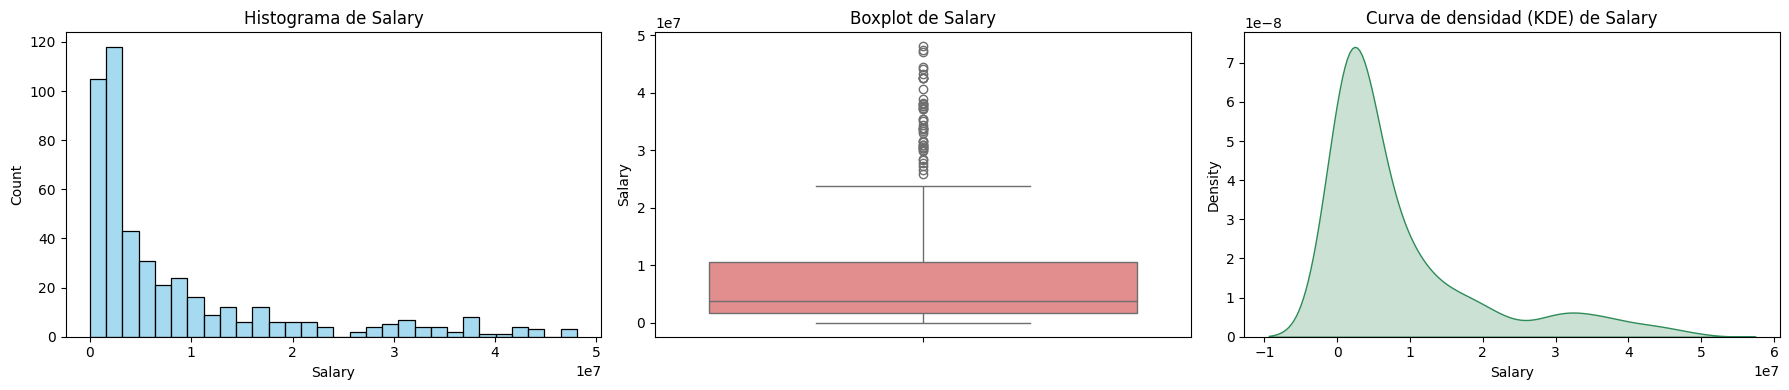

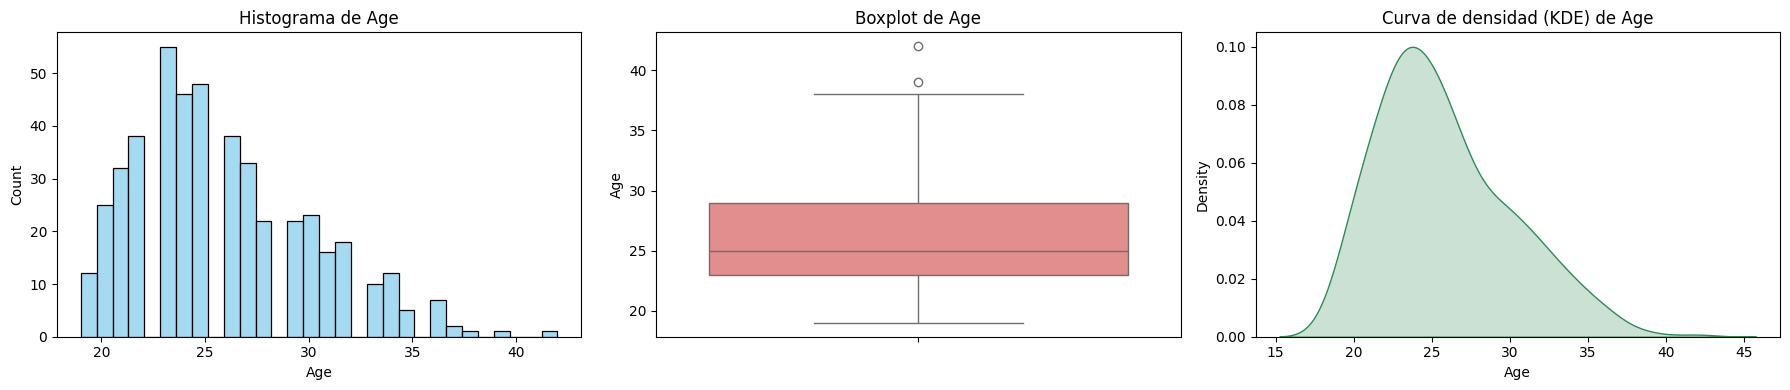

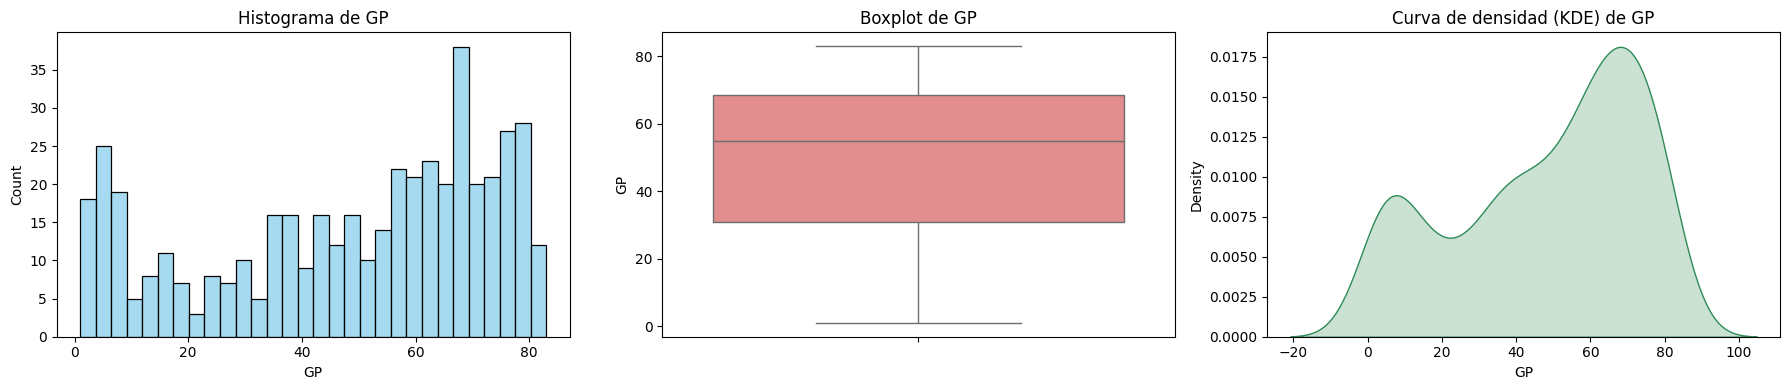

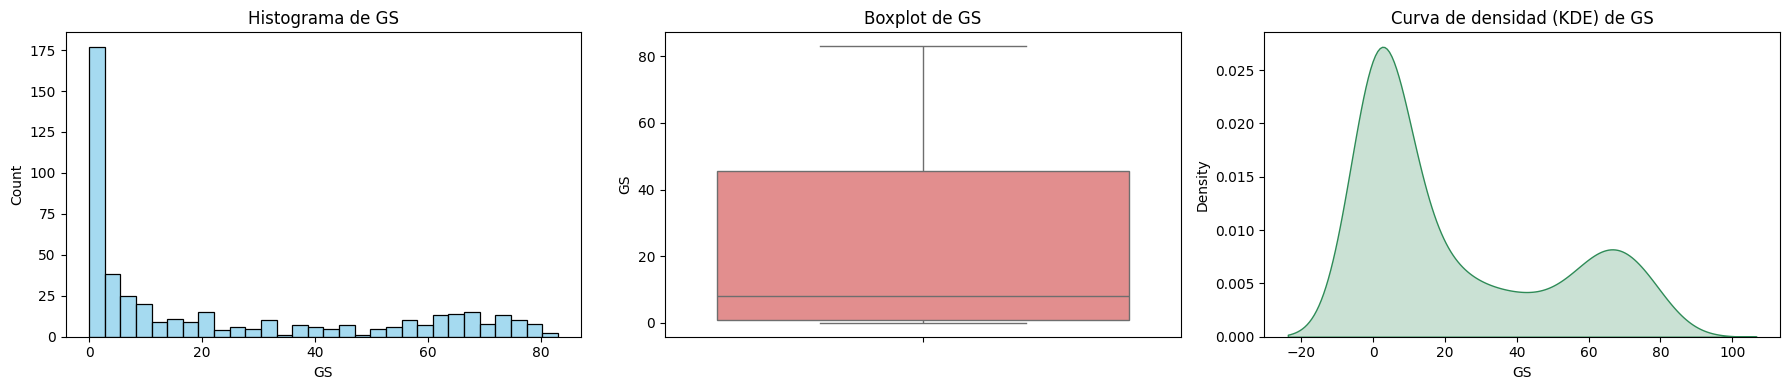

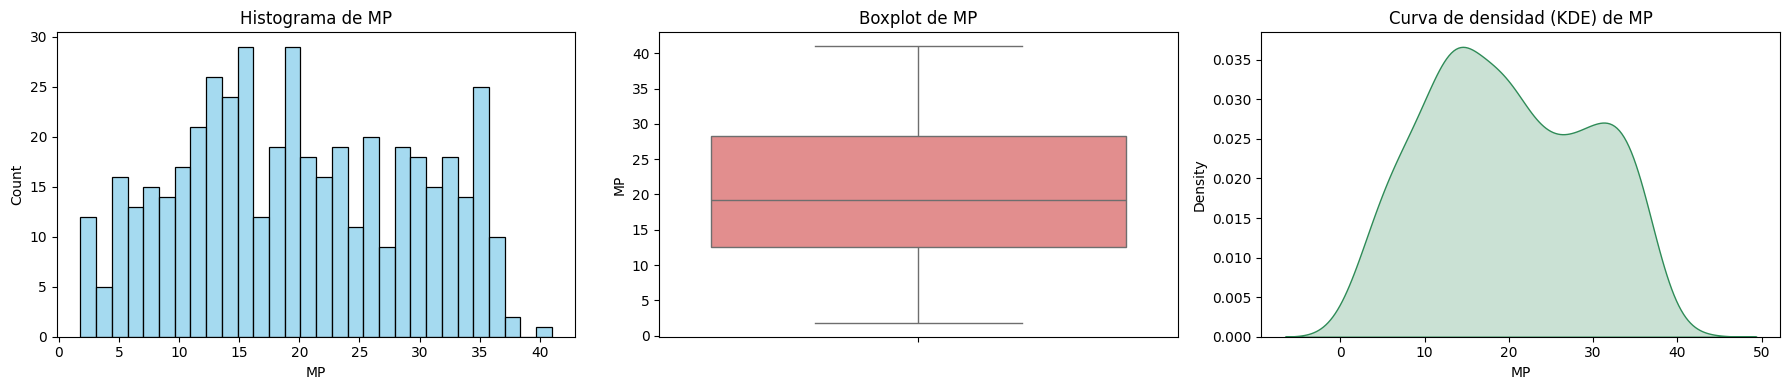

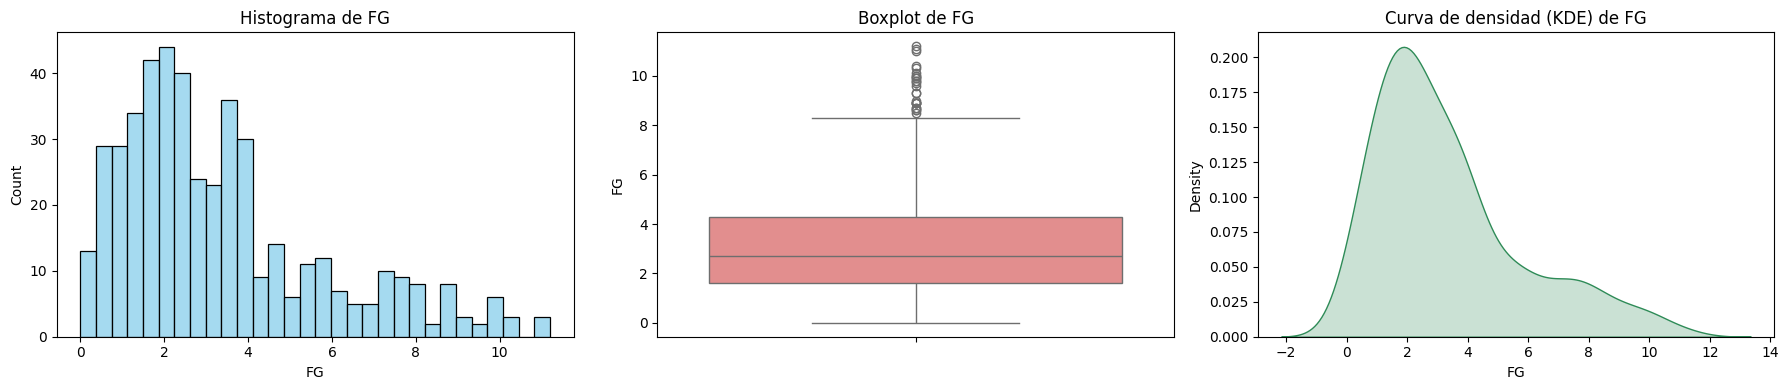

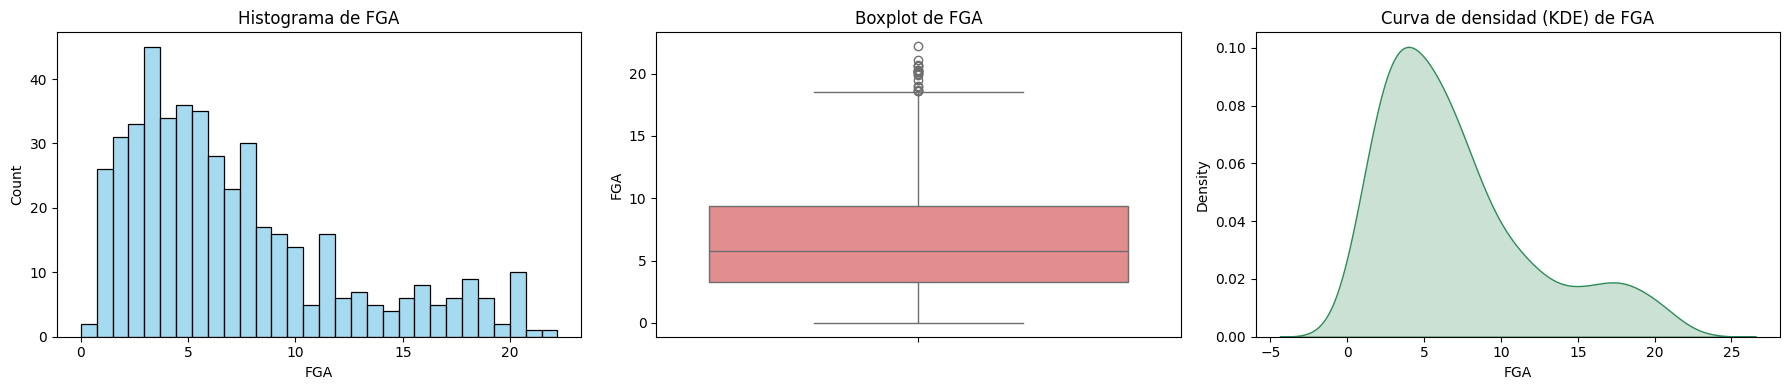

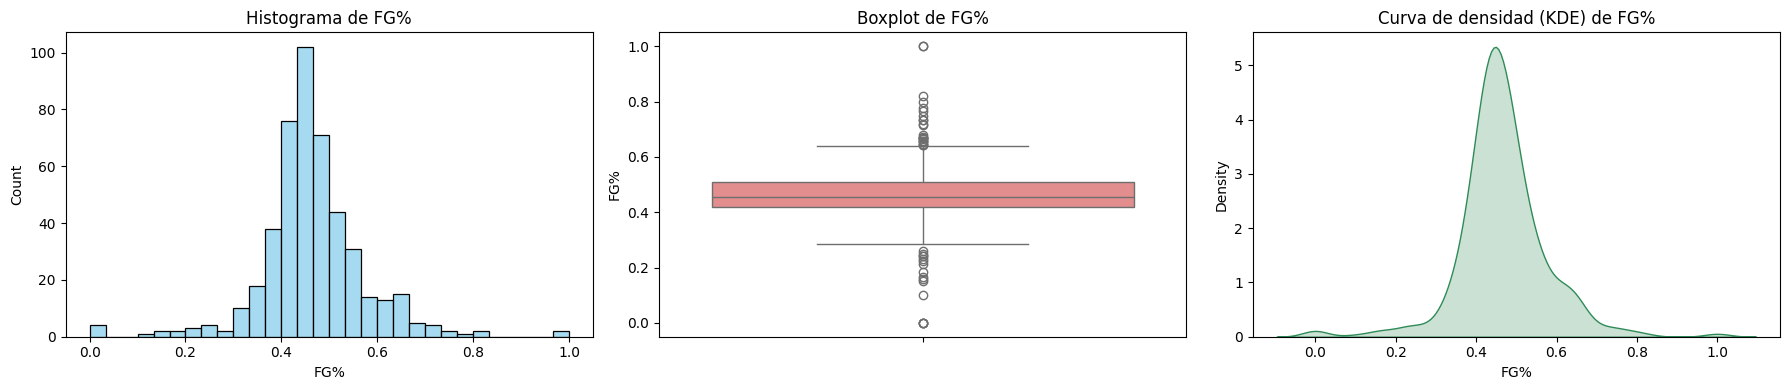

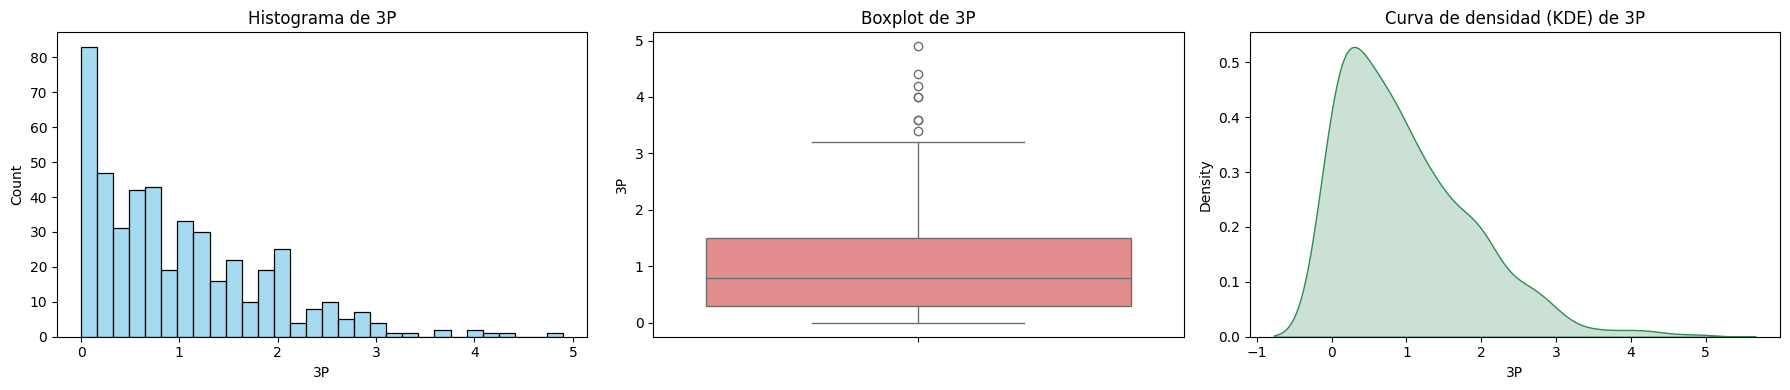

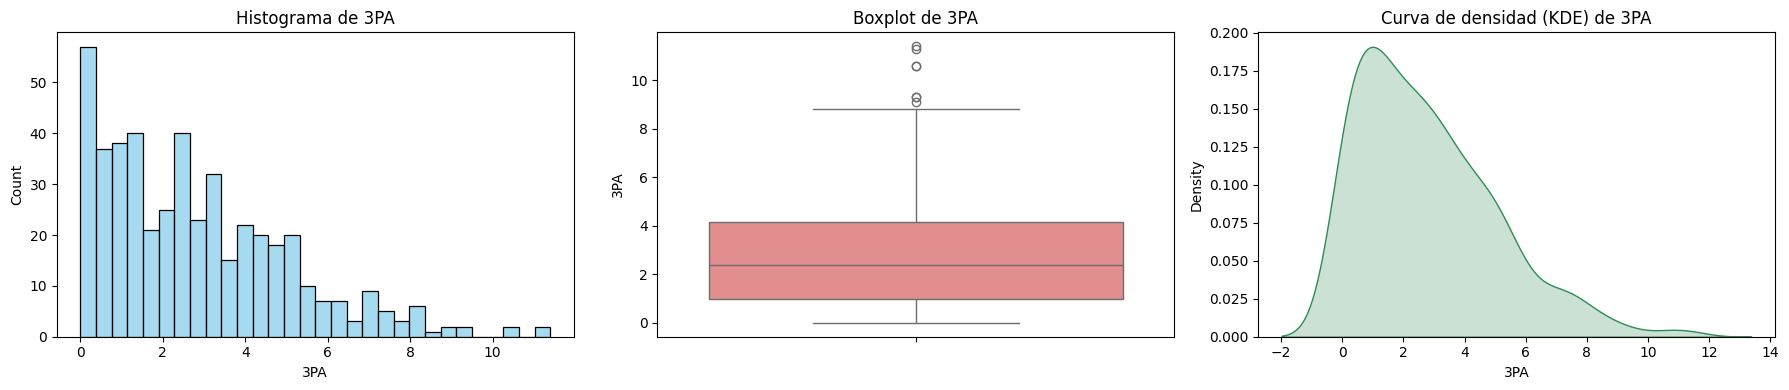

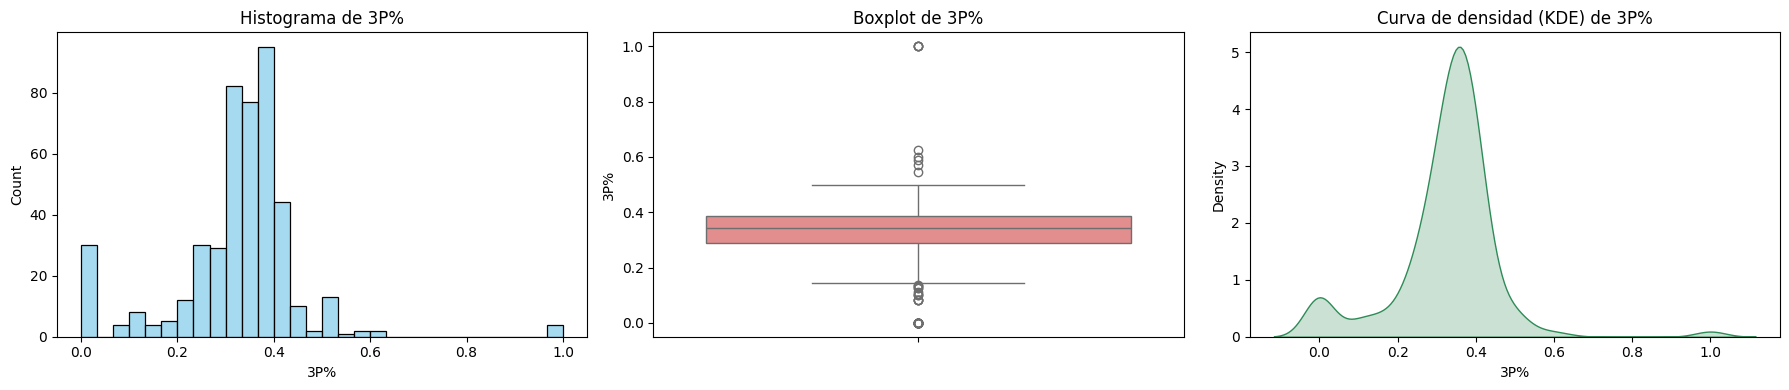

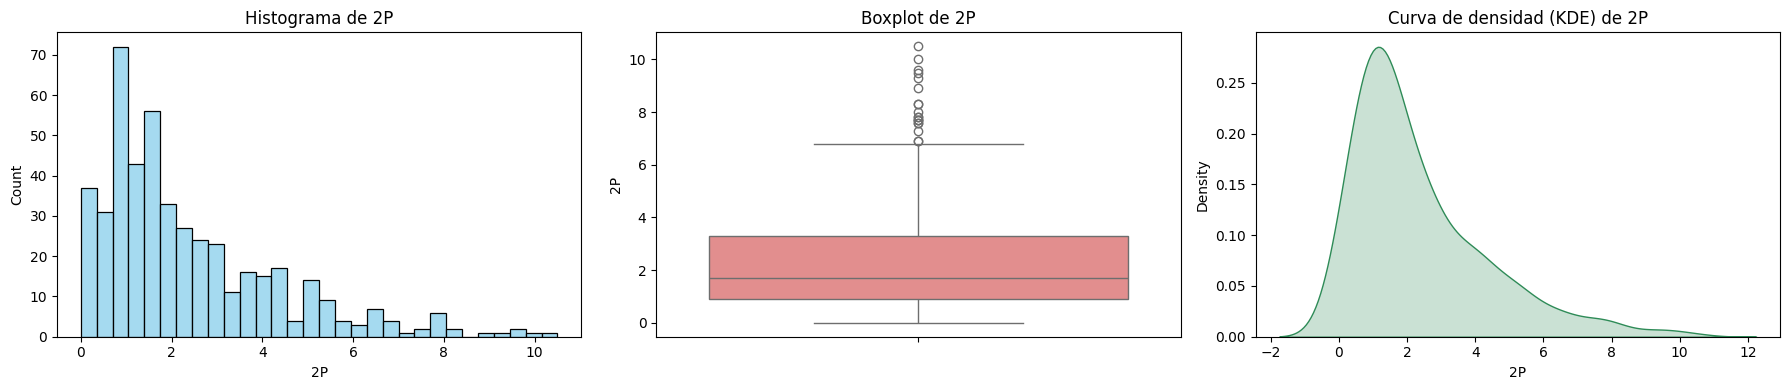

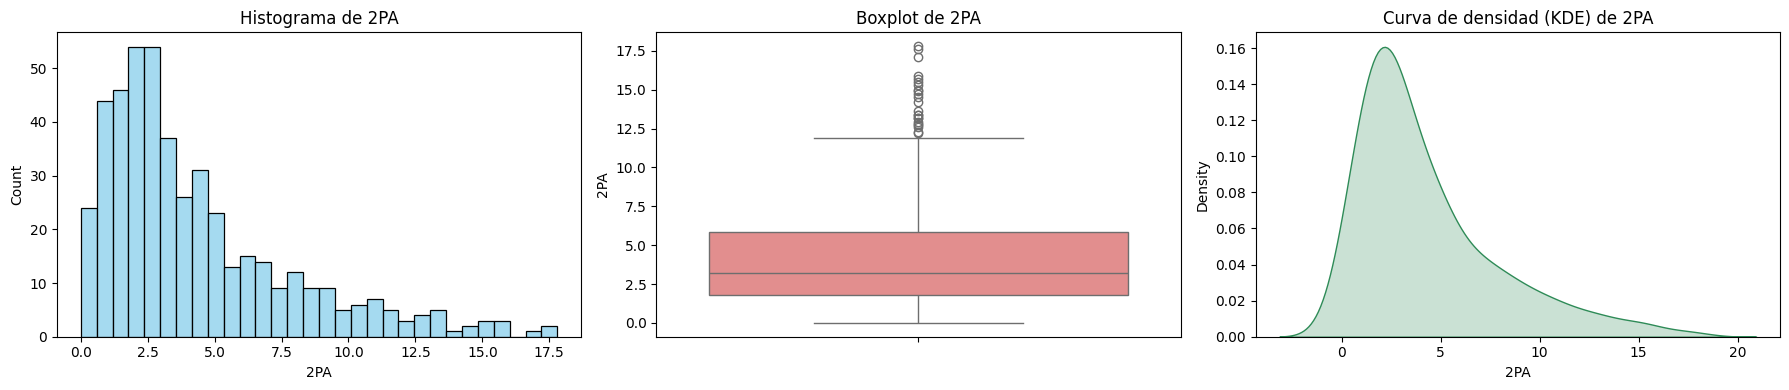

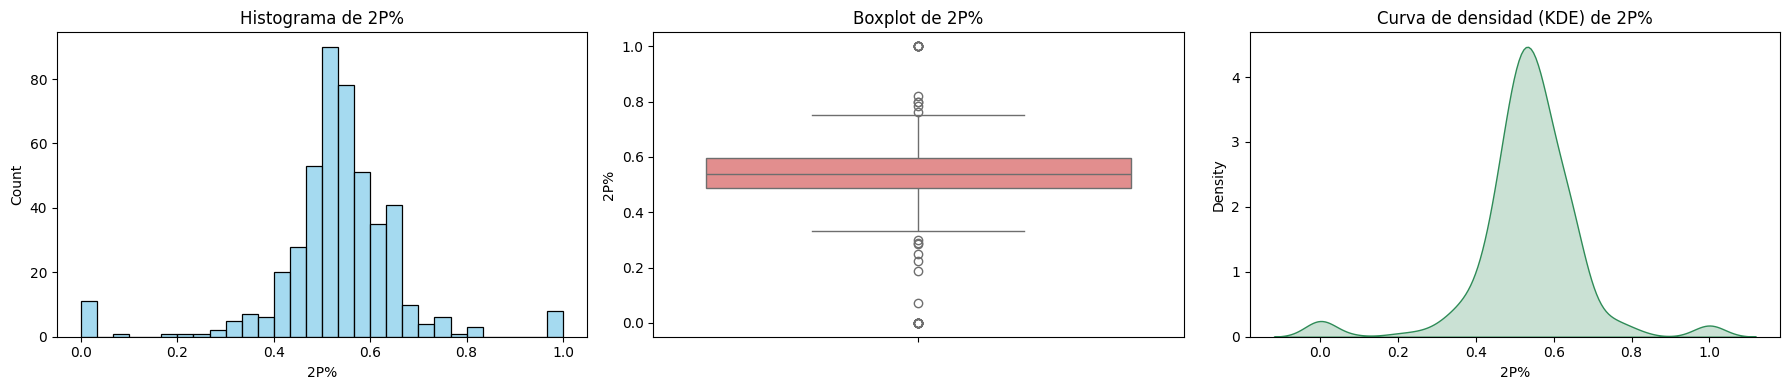

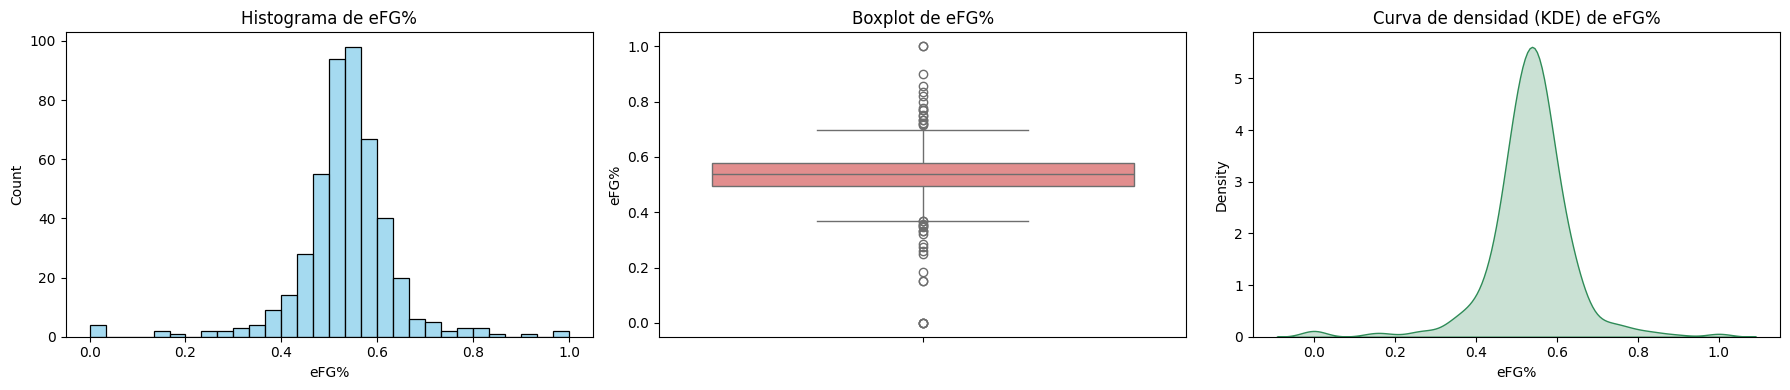

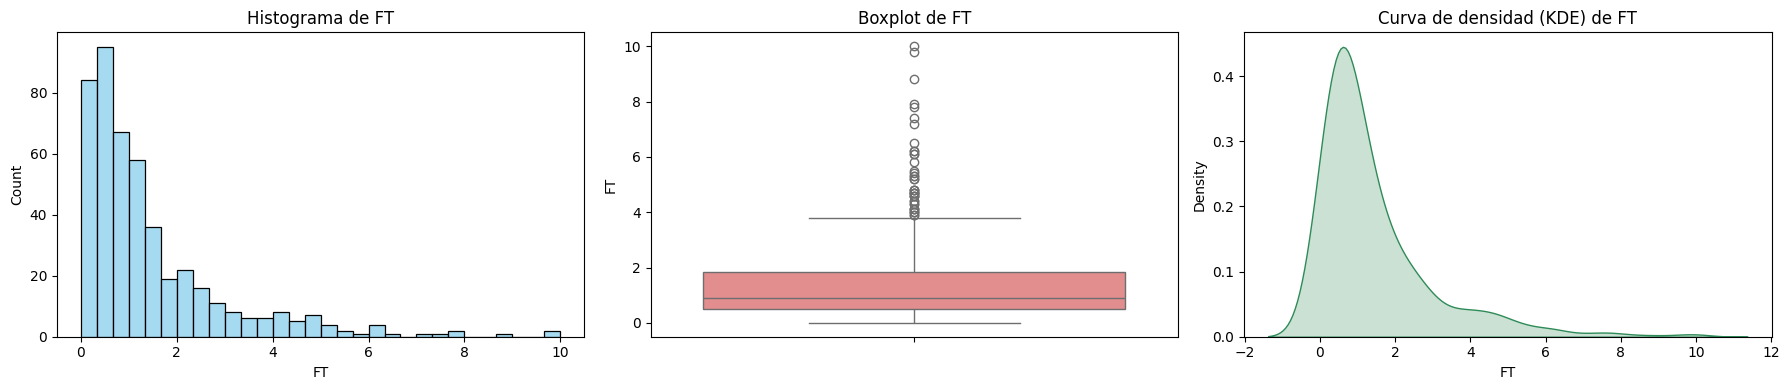

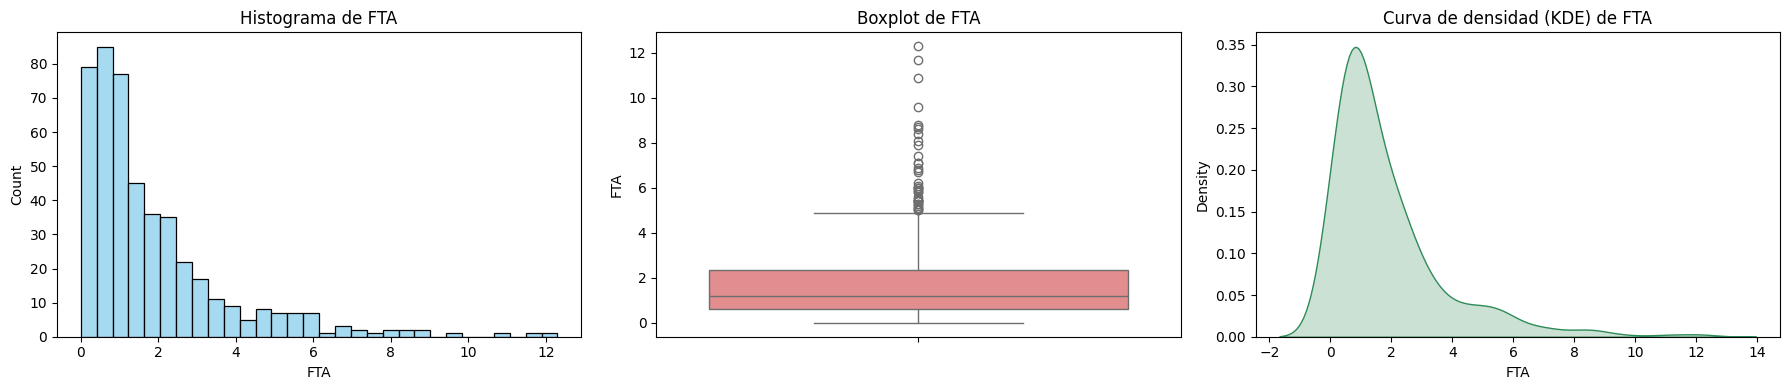

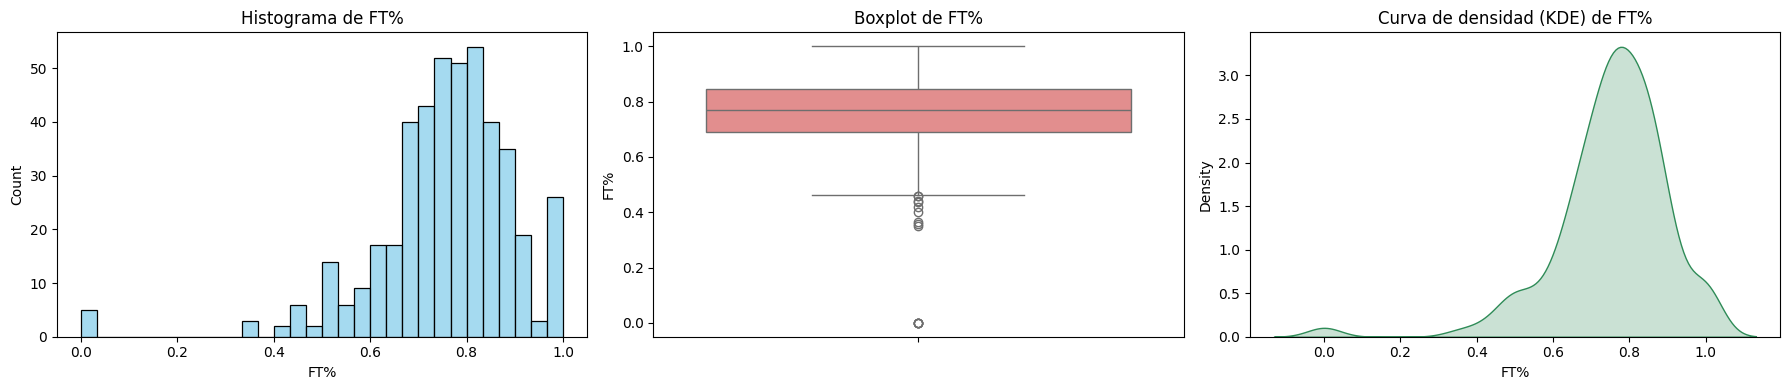

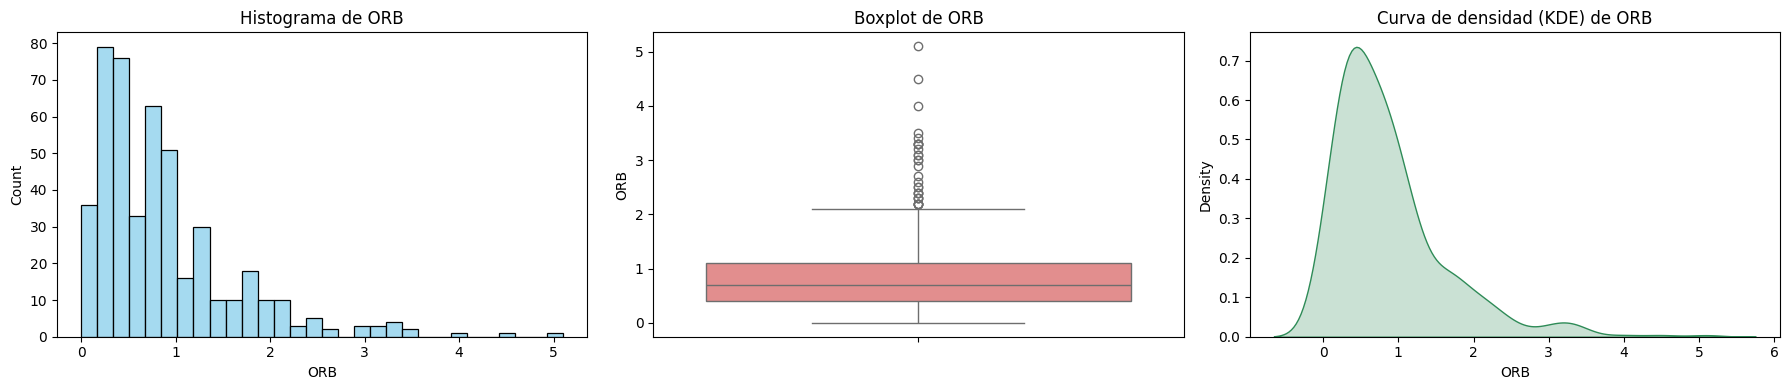

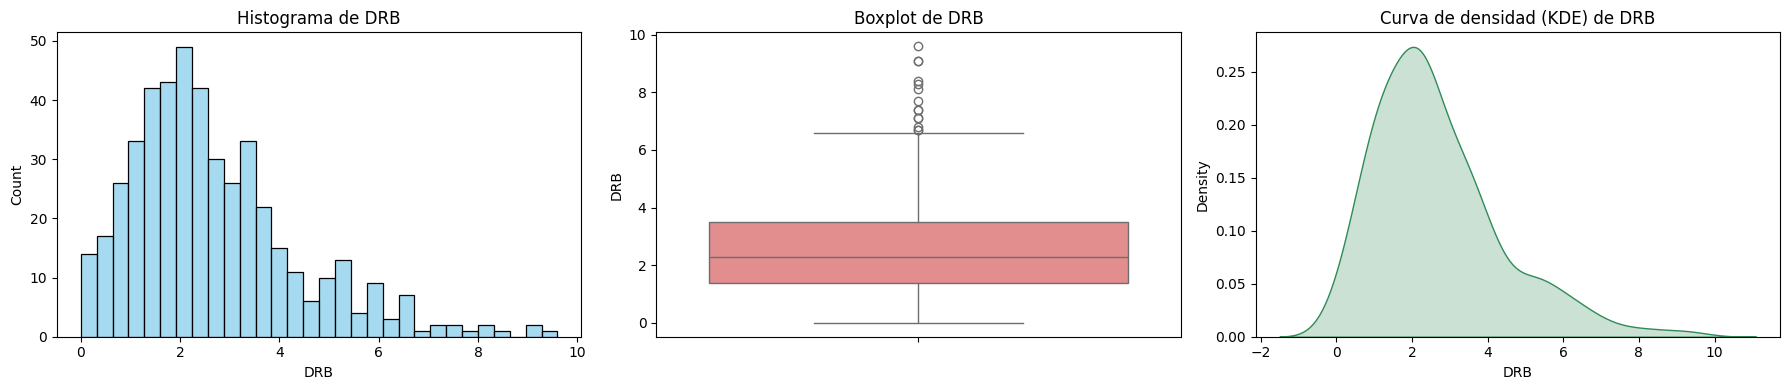

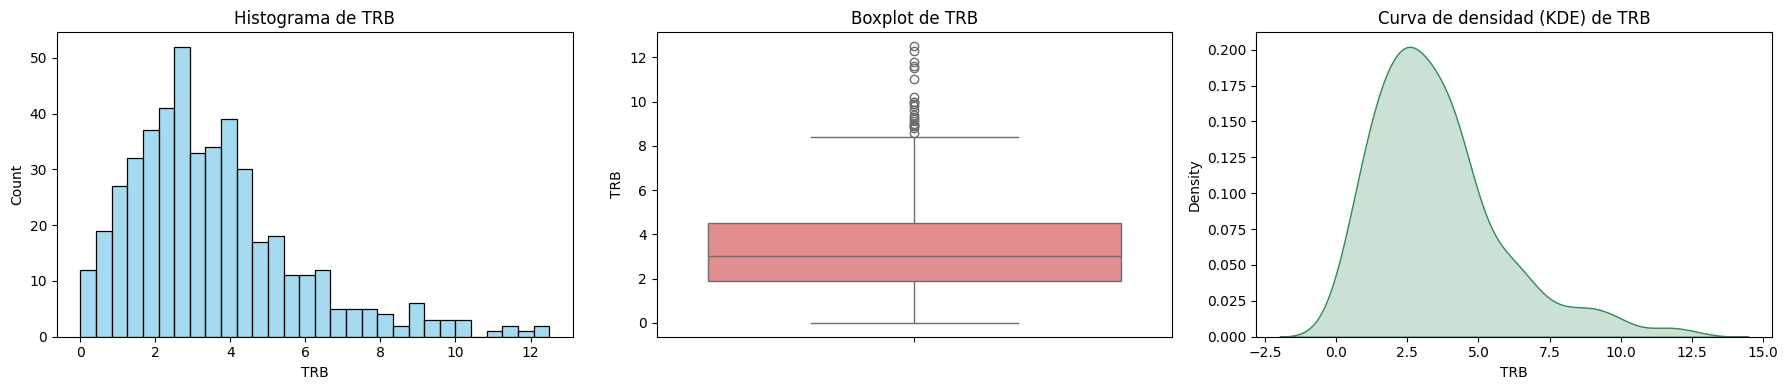

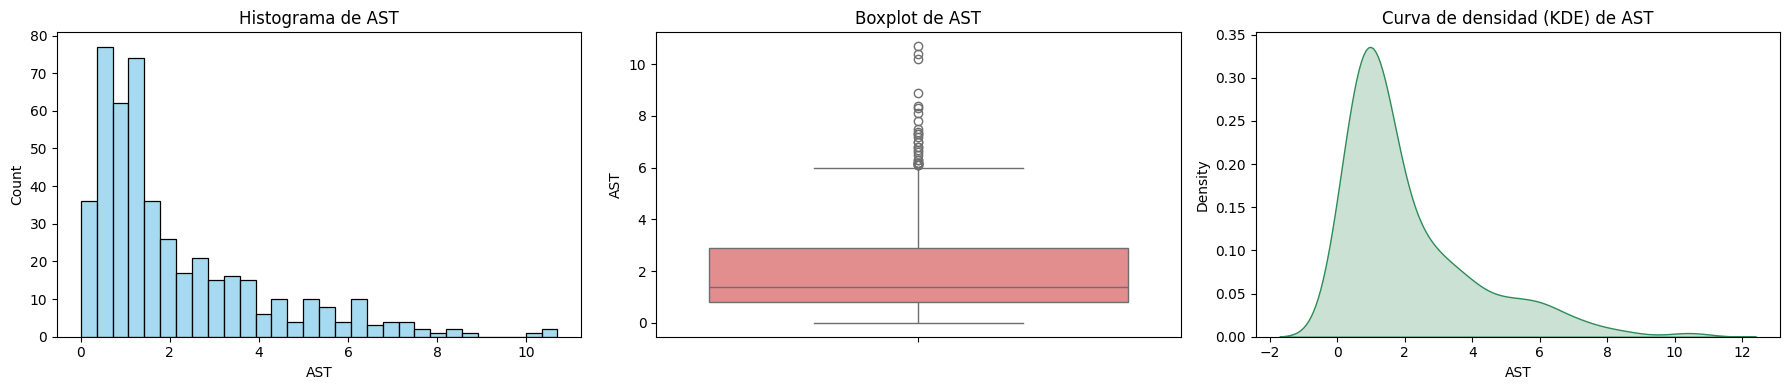

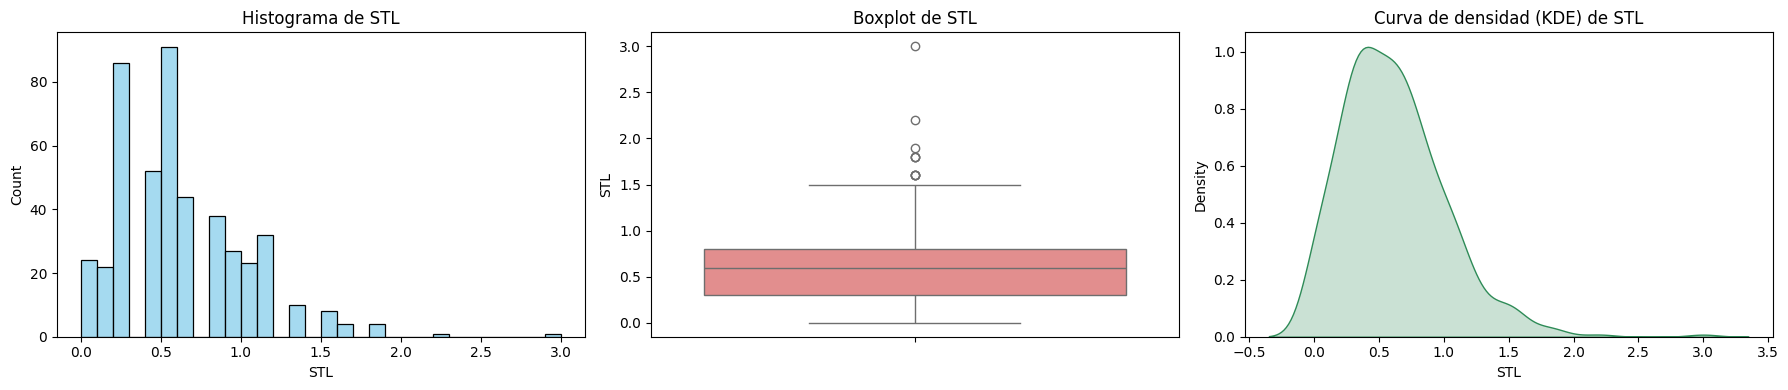

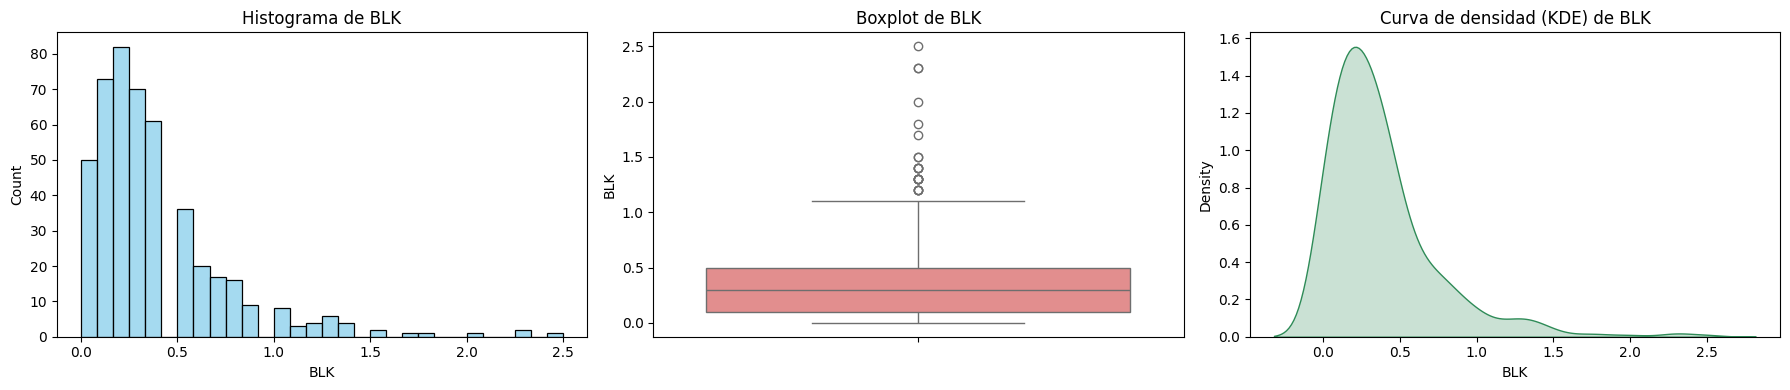

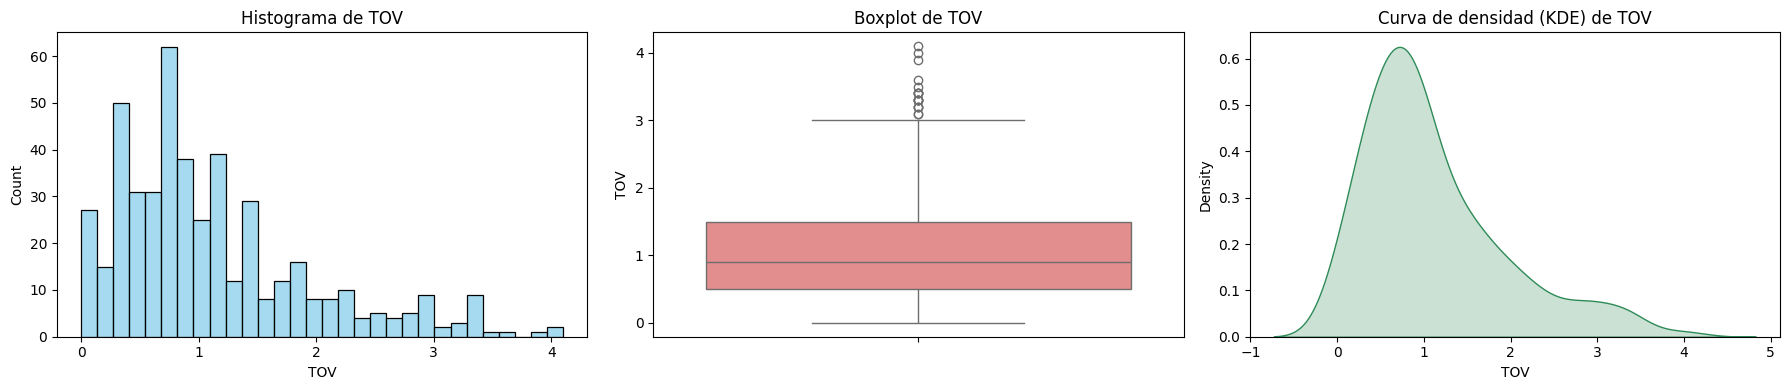

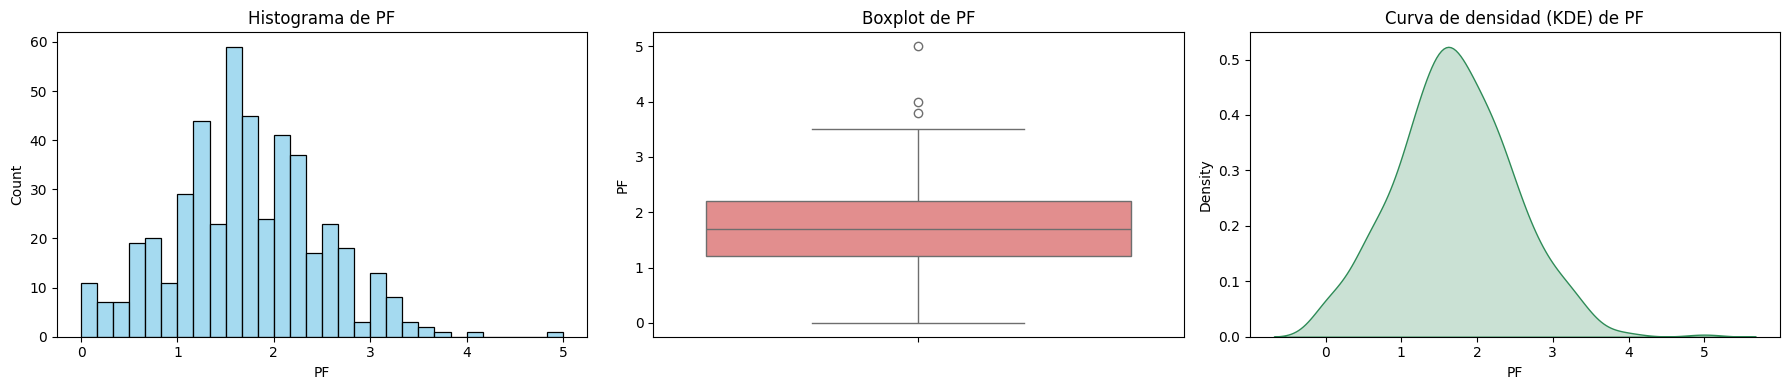

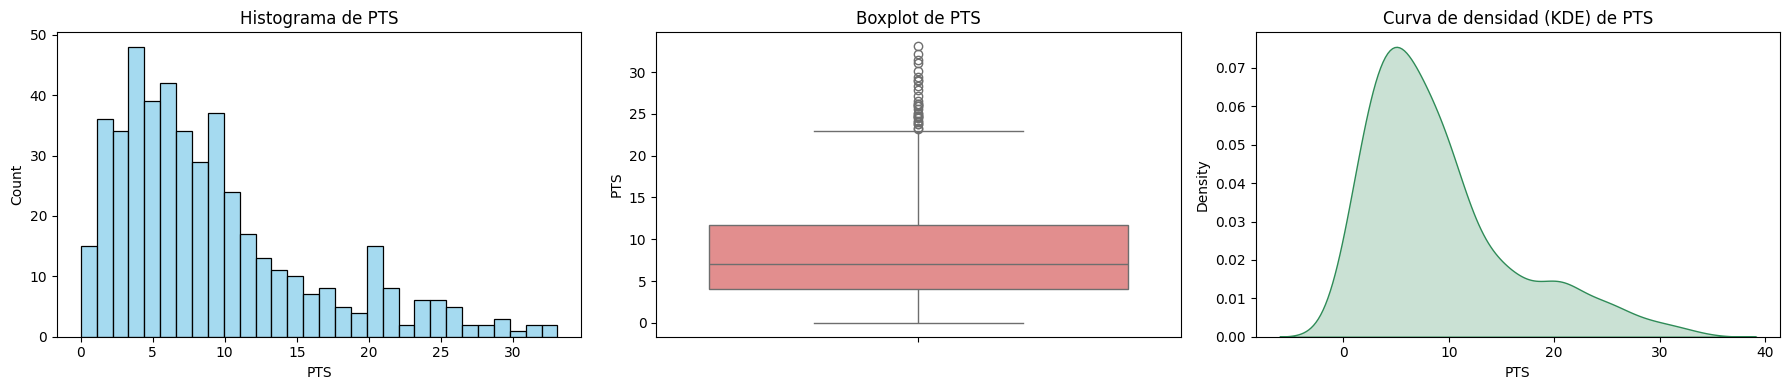

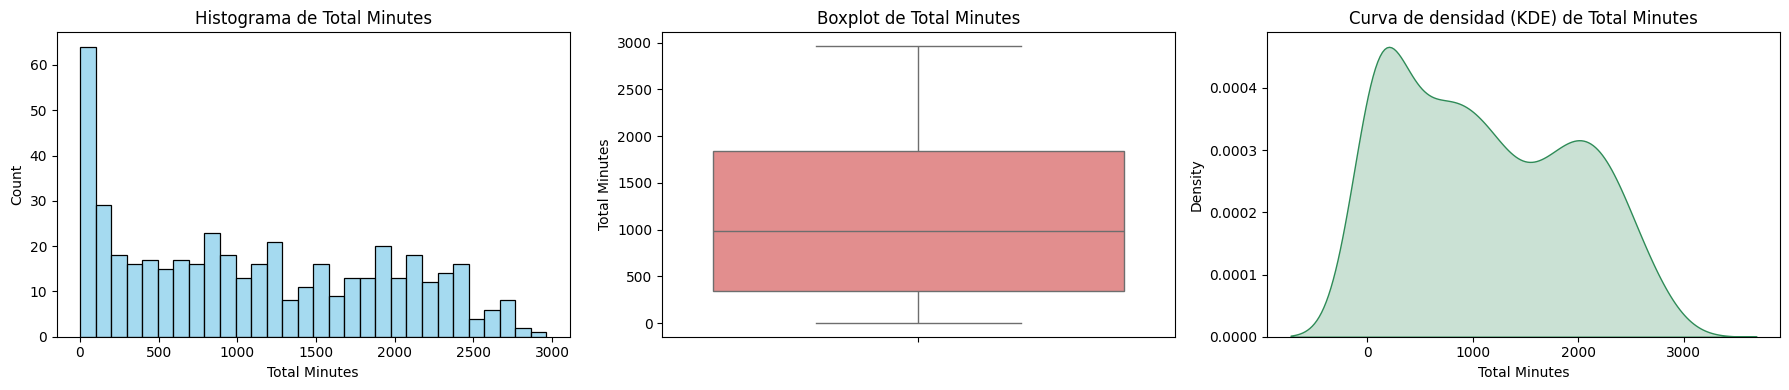

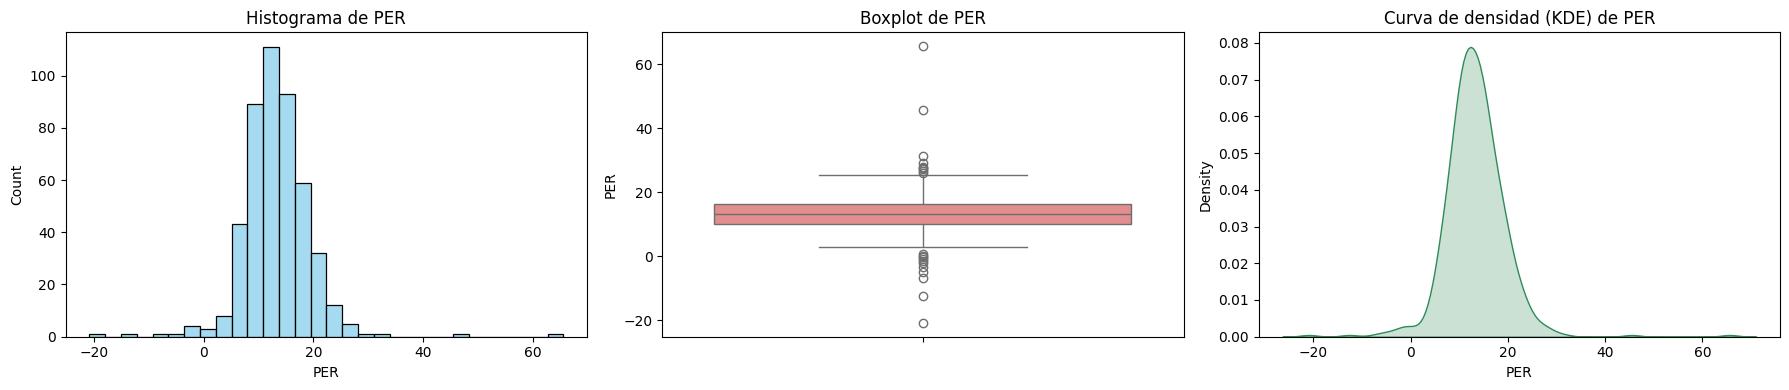

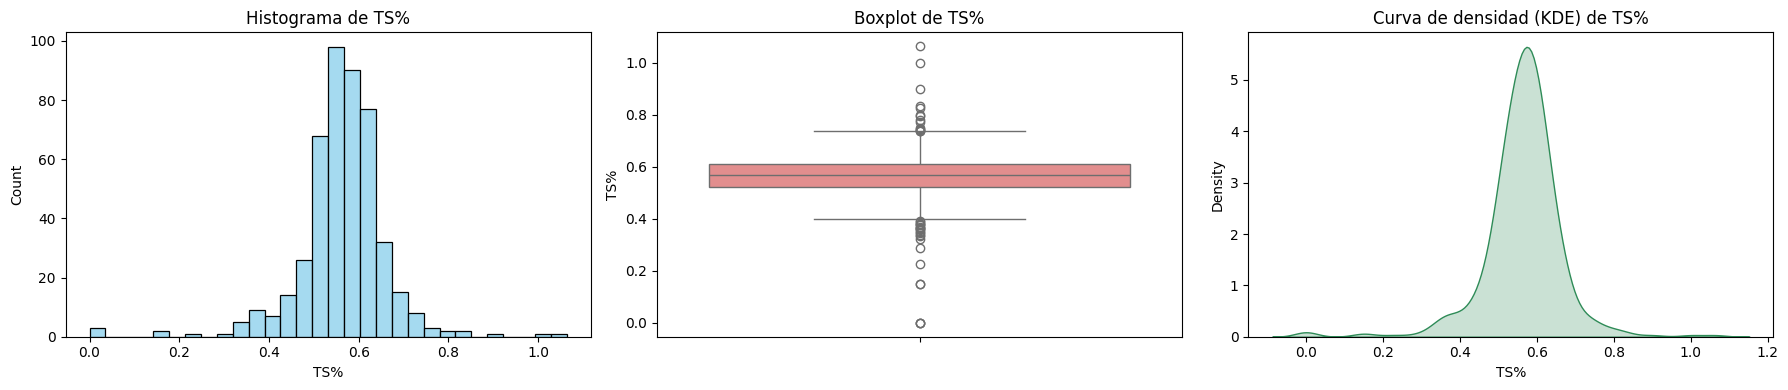

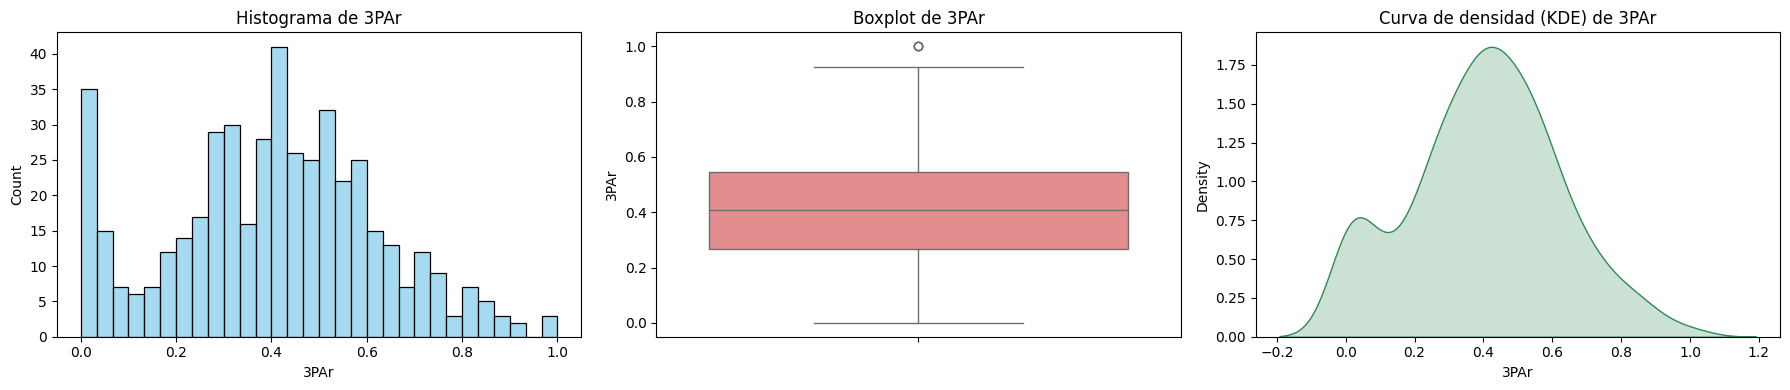

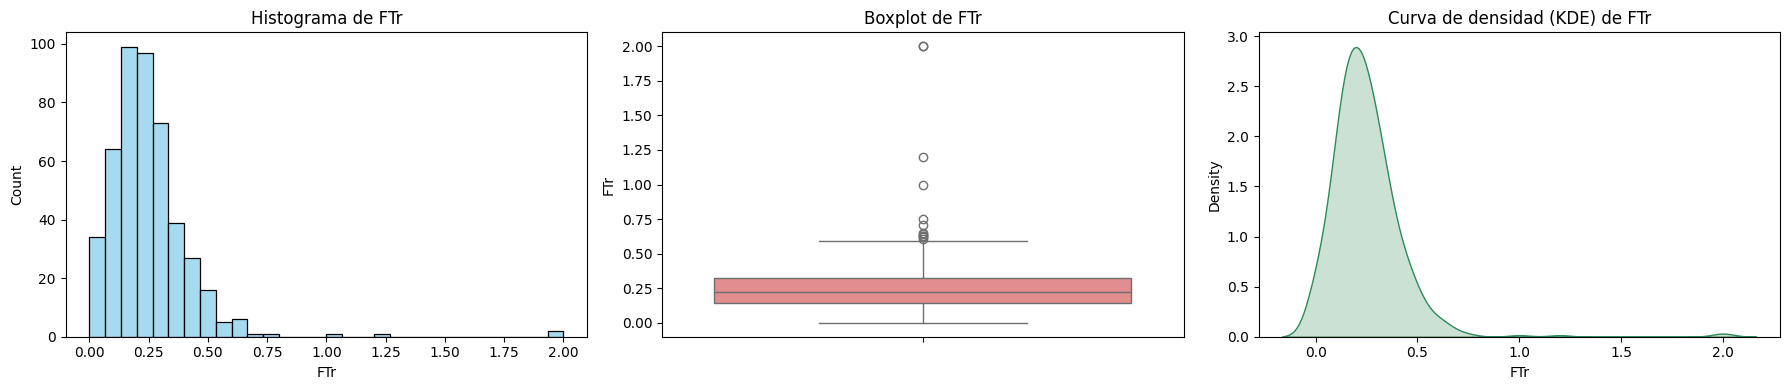

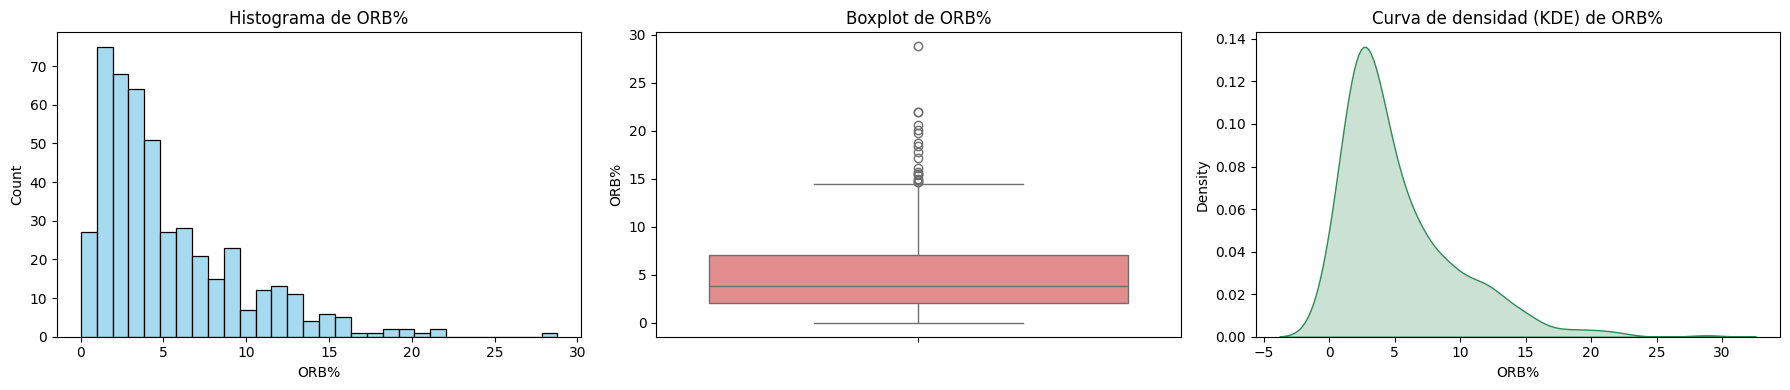

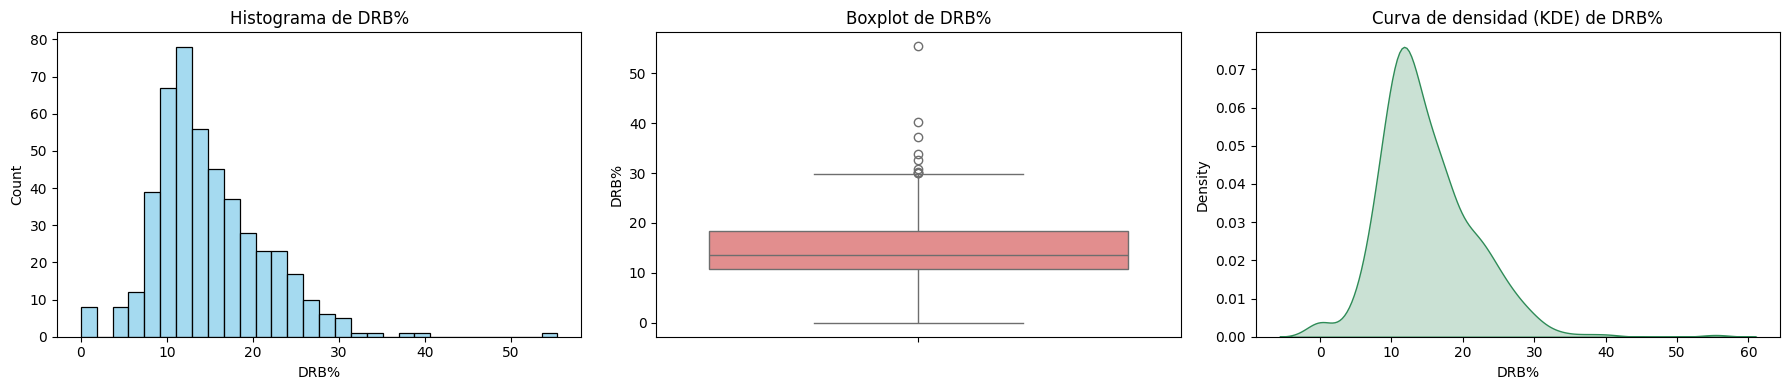

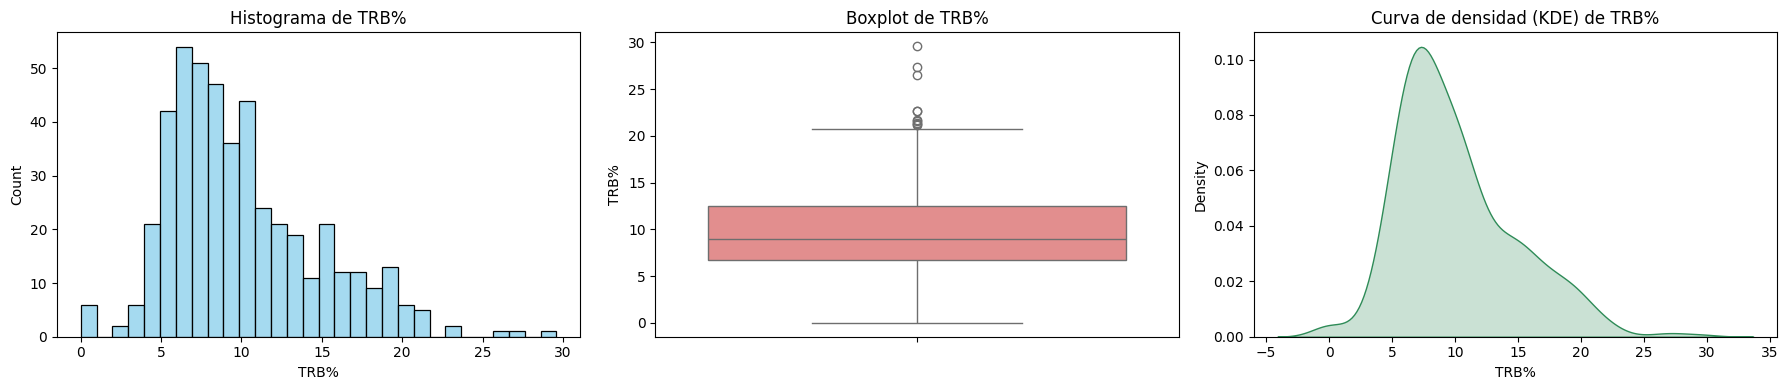

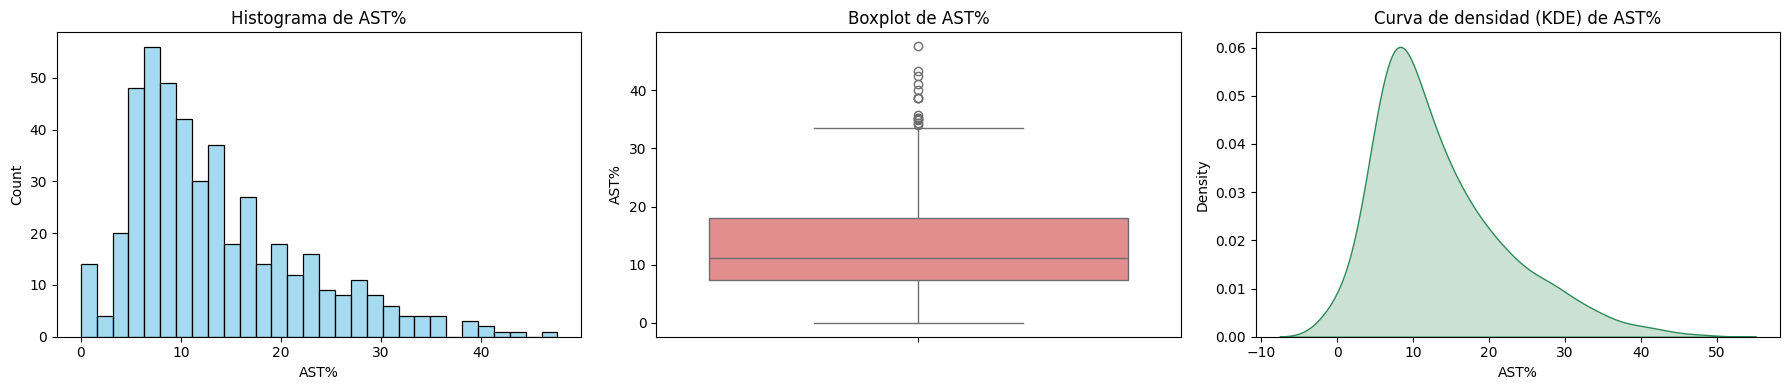

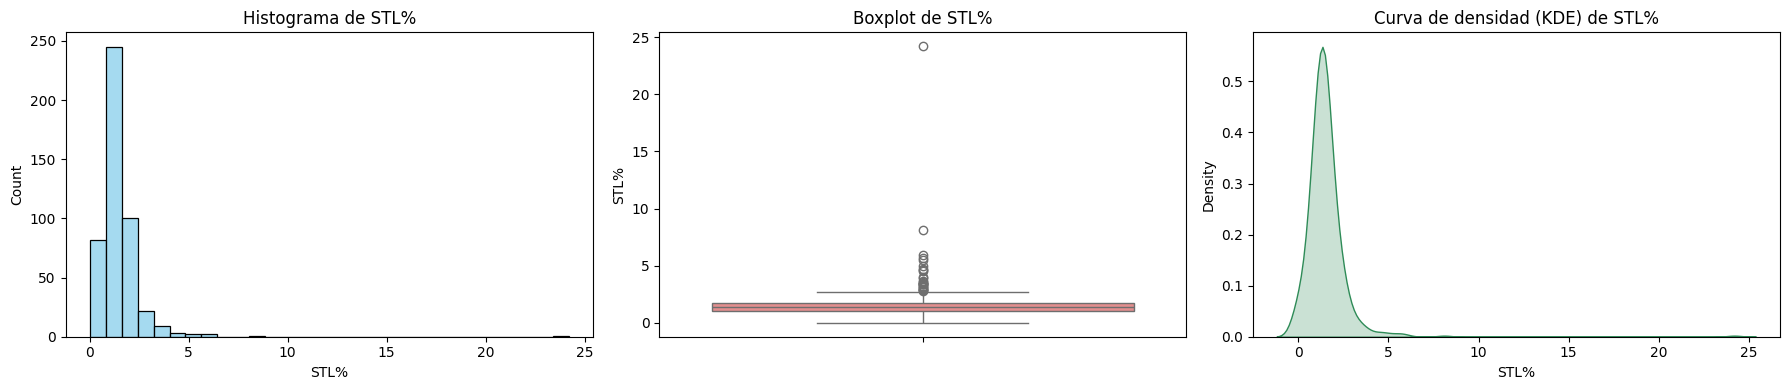

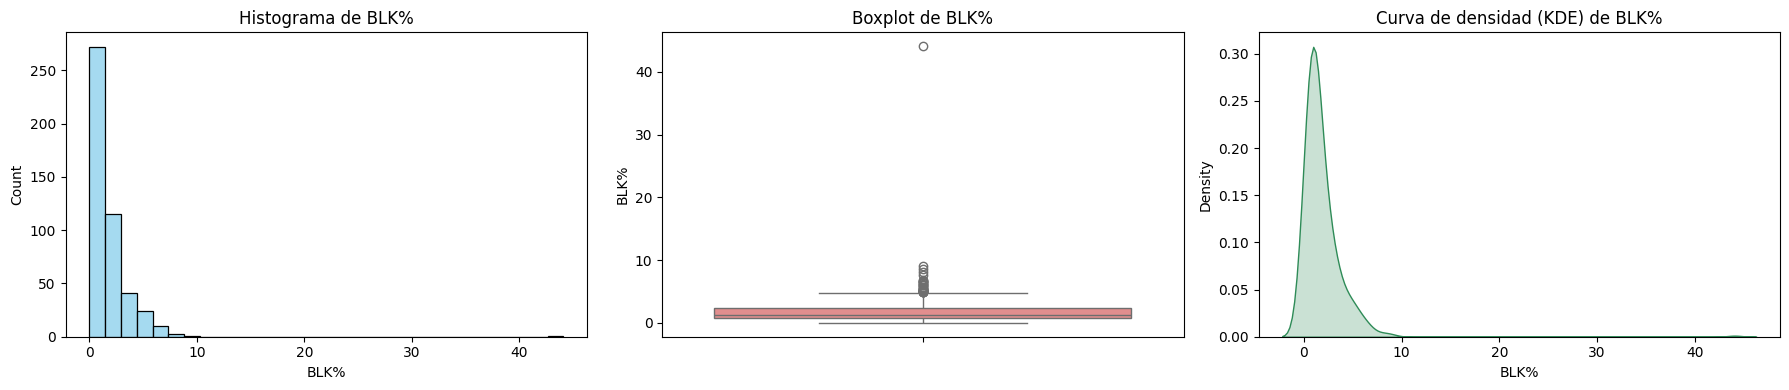

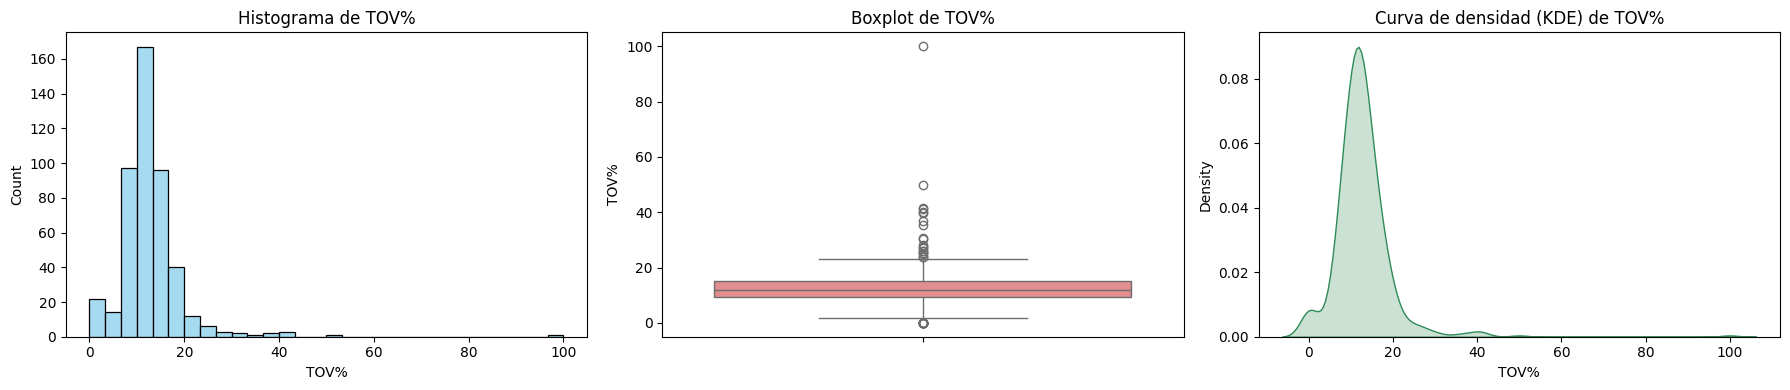

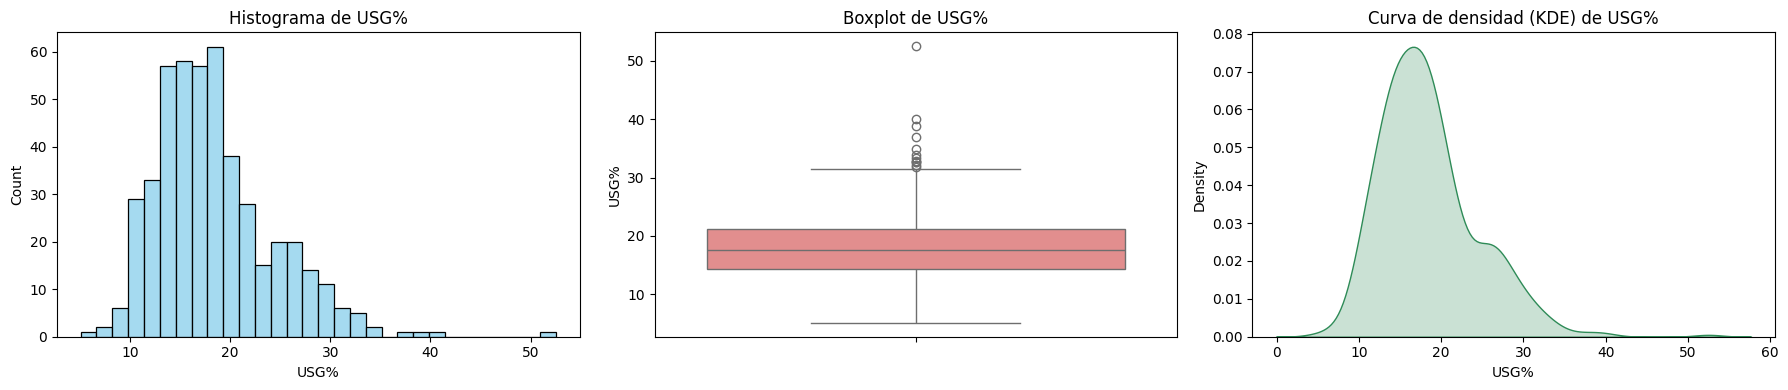

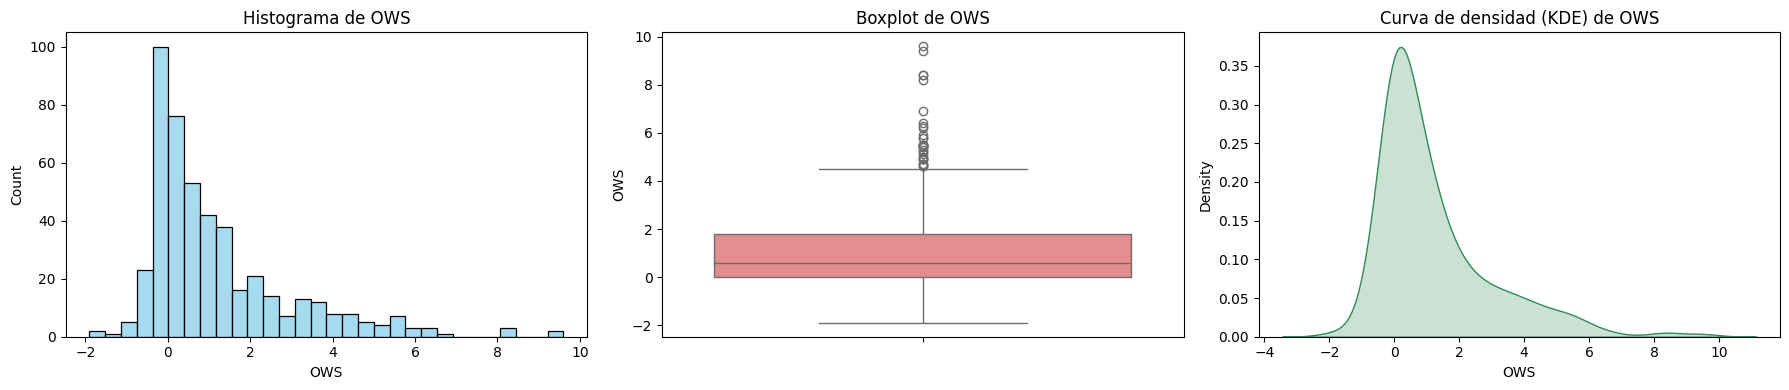

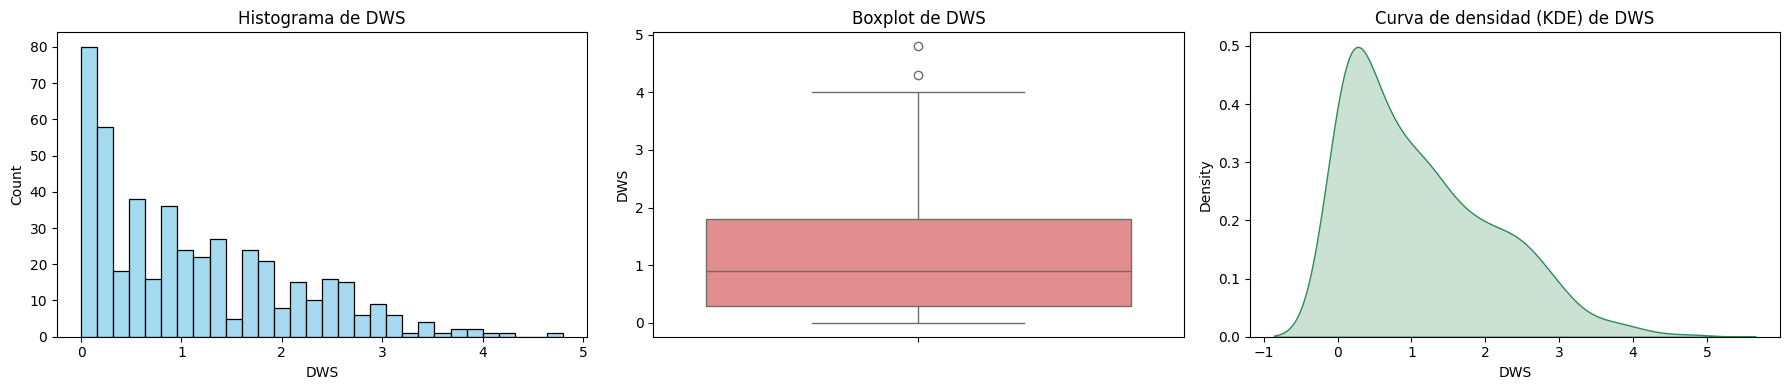

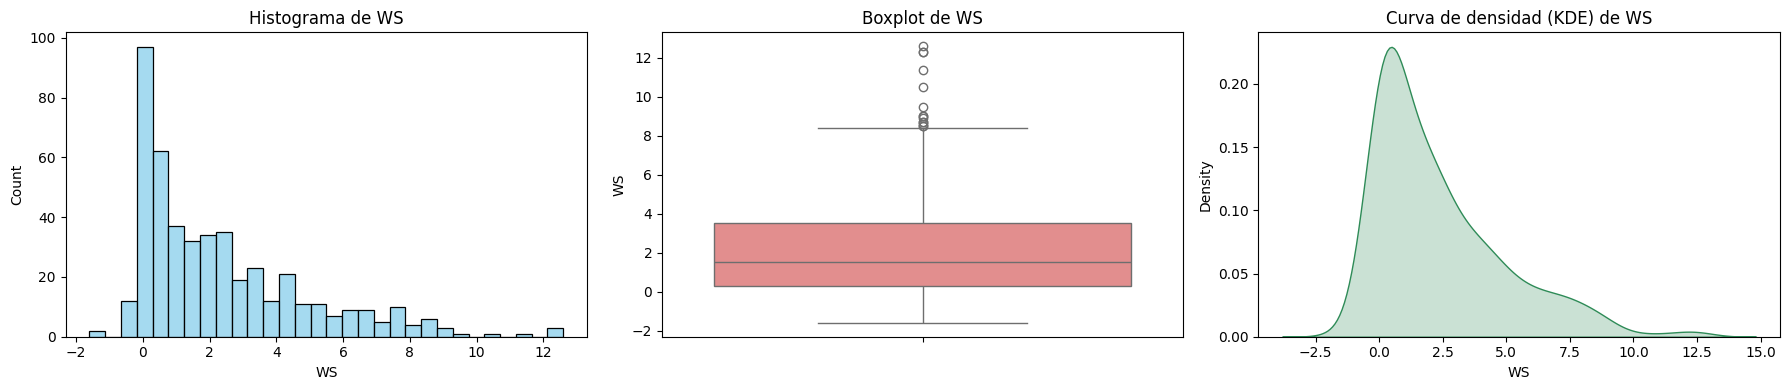

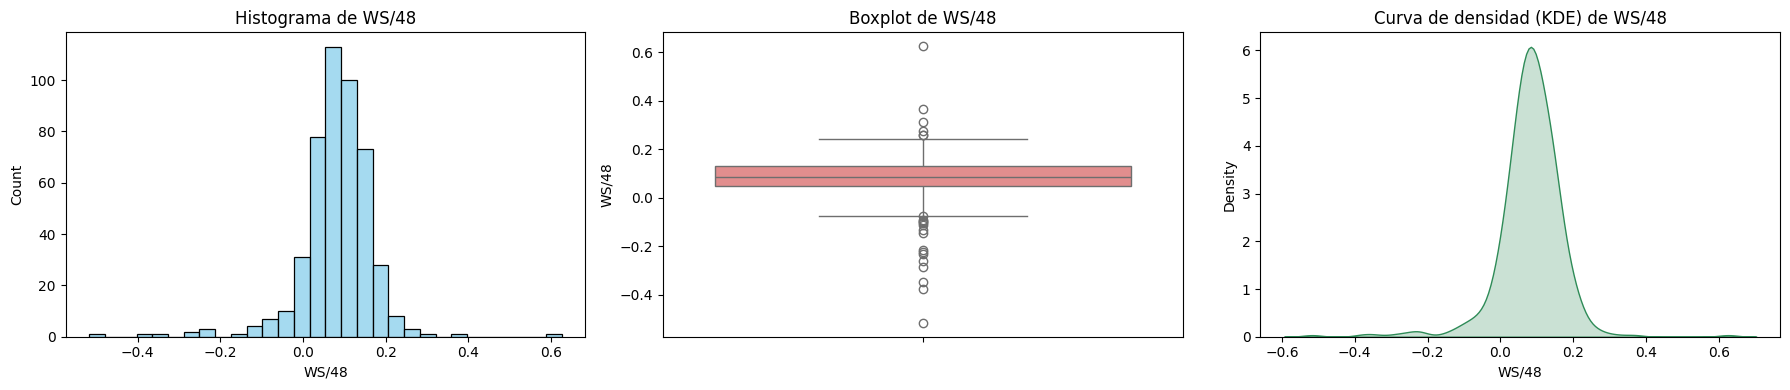

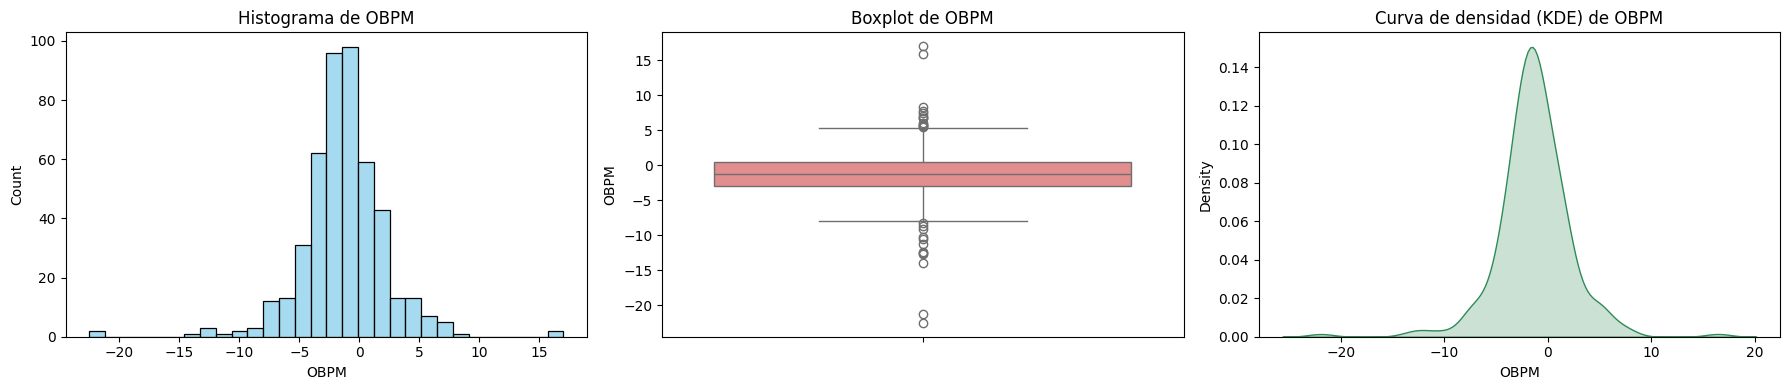

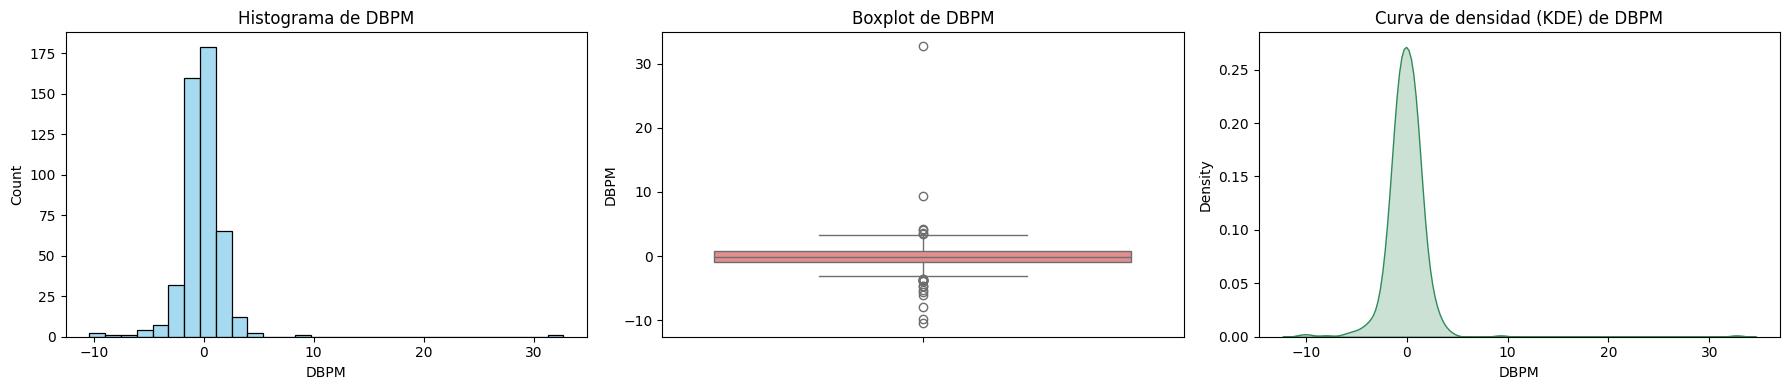

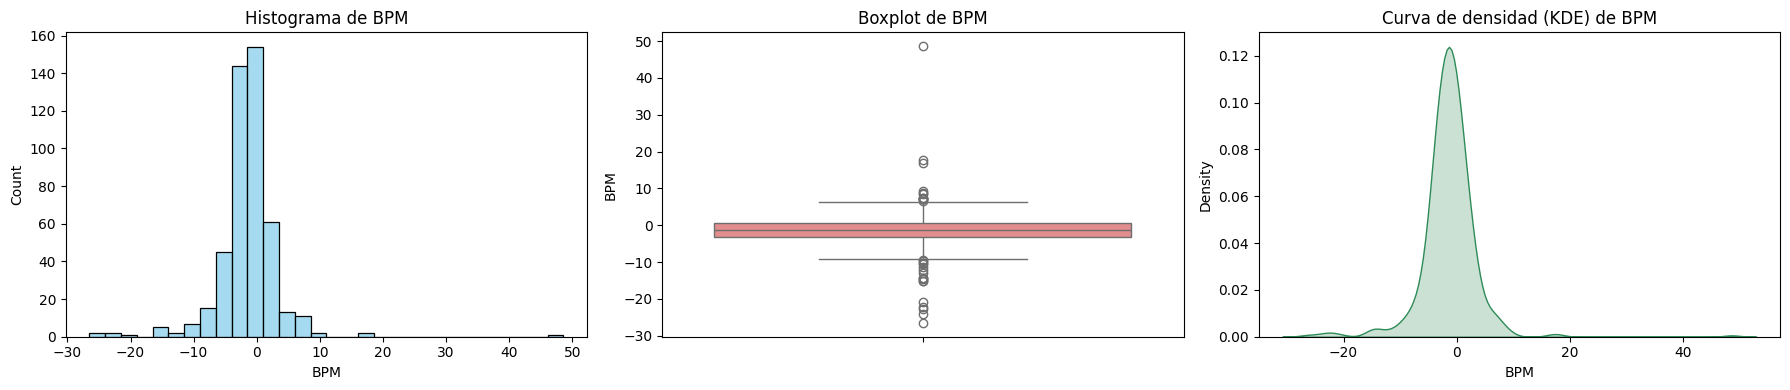

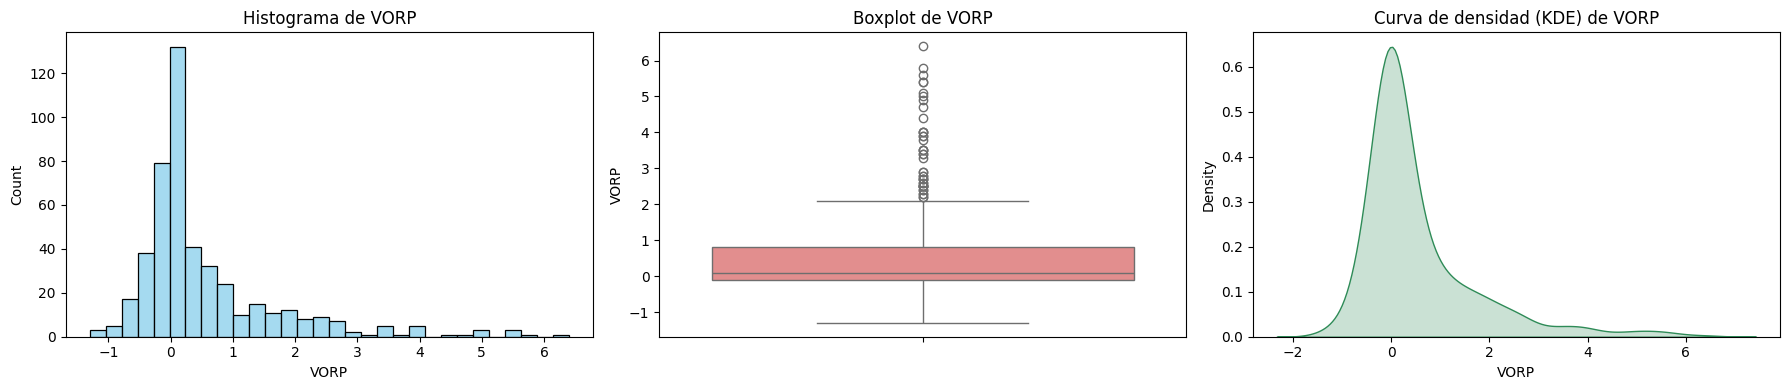

In [16]:
for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    sns.histplot(df[col], kde=False, bins=30, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histograma de {col}")

    sns.boxplot(y=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f"Boxplot de {col}")

    sns.kdeplot(df[col], fill=True, ax=axes[2], color='seagreen')
    axes[2].set_title(f"Curva de densidad (KDE) de {col}")

    plt.tight_layout()
    plt.show()

- Primero observamos diferencias enormes en los saliros, 6.000 es el mínimo y 48 millones el máximo, vemos una desviación estándar muy alta. Además en el histograma vemos que la mayoría de jugadores están en la izquierda, es decir, hay muy pocas superestrellas que cobran sueldos altísimos y muchiísimos jugadores de rol que cobran sueldos más bajos, algo que es lógico por el límite salarial impuesto por la NBA.
- En la edad vemos que la mayoría de jugadores están entre 23 y 29 años, con una edad media en la liga de 26 años, es decir, está liderada por jugadores jóvenes aunque encontramos veteranos de hasta 42 años.
- En la mayoría de estadísticas totales observamos que en los histogramas la mayor cantidad de jugadores se encuentran a la izquierda, es decir, hay muy pocos jugadores que destaquen, lo cual vuelve a mostrar las diferencias entre jugadores de rol vs superestrellas.
- En la mayoría de las estadísticas porcentuales (FG%, FT%,...) las distribuciones son normales, es decir, la mayoría de los jugadores están cercanos a la media y luego hay pocos jugadores que destaquen tanto por arriba como por abajo de estos porcentajes medios.
- Respecto a 3P y 3PA, casi todos intentan triples (n_unique=84 intentos distintos), media ≈ 2.8 intentos con ≈ 1 acierto, esto implica una clara dependencia del tiro de 3. También las estadísticas 3PAr y FTr muestran cómo el juego moderno depende cada vez más de triples (media 0.40) y de sacar faltas (media 0.25).
- En general, la mitad baja/media de la mayoría de variables muestra cajas de tamaño similar, indicando cierta homogeneidad en el grupo central de jugadores.
- Para las variables con distribución aproximadamente normal (MP, FG%, etc.), las cajas son más estrechas y centradas, lo que indica menor variabilidad relativa.
- GP tiene una caja amplia y situada hacia valores altos, lo que indica que muchos jugadores juegan gran parte de la temporada, sin embargo, GS (titularidades) presenta también una caja grande pero desplazada hacia abajo y en el histograma vemos un pico enorme en 0 y luego una distribución bastante uniforme, mostrando que aunque muchos juegan bastante no hay tantos que lo hagan como como titulares constantes.
- En métricas de porcentaje defensivo/impacto como STL% o BLK%, las cajas son muy estrechas y situadas en valores bajos, lo que refleja que en promedio estas acciones son poco frecuentes y diferenciadoras solo en unos pocos jugadores.


**En conclusión:**

- Las métricas acumulativas (PTS, rebotes, asistencias, minutos, salario,...) están muy sesgadas por la presencia de superestrellas, mientras que la mayoría de jugadores se concentran en la parte baja.

- Las métricas de eficiencia (FG%, TS%, PER, etc.) tienden a distribuciones más normales, capturando un rendimiento medio más homogéneo.

- En términos de disponibilidad (GP, TM) es relativamente uniforme, indicando diversidad de carga de minutos entre jugadores.

In [17]:
df[['Team_1', 'Team_2']] = df['Team'].str.split('/', n=1, expand=True)
df[['Player Name', 'Team', 'Team_1', 'Team_2']].head(10)

Player Name     Team Team_1 Team_2
0          Stephen Curry      GSW    GSW   None
1              John Wall      LAC    LAC   None
2      Russell Westbrook  LAL/LAC    LAL    LAC
3           LeBron James      LAL    LAL   None
4           Kevin Durant  BRK/PHO    BRK    PHO
5           Bradley Beal      WAS    WAS   None
6          Kawhi Leonard      LAC    LAC   None
7            Paul George      LAC    LAC   None
8  Giannis Antetokounmpo      MIL    MIL   None
9         Damian Lillard      POR    POR   None

In [18]:
cat_cols = df.select_dtypes(include=['object']).columns
resumen = []

for col in cat_cols:
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True) * 100

    moda = counts.index[0]
    moda_freq = counts.iloc[0]
    moda_pct = percents.iloc[0]

    n_cats = df[col].nunique()
    entropia = entropy(percents/100, base=2)  # diversidad de categorías

    resumen.append({
        'Variable': col,
        'n_categorías': n_cats,
        'Moda': moda,
        'Frecuencia moda': moda_freq,
        'Porcentaje moda (%)': round(moda_pct, 2),
        'Entropía': round(entropia, 3)
    })

tabla_cat = pd.DataFrame(resumen).set_index('Variable')
tabla_cat

n_categorías           Moda  Frecuencia moda  Porcentaje moda (%)  Entropía
Variable                                                                                
Player Name           467  Jacob Gilyard                1                 0.21     8.867
Position                9             SG              115                24.63     2.416
Team                   75            SAC               19                 4.07     5.503
Team_1                 30            BRK               21                 4.50     4.885
Team_2                 22            PHO                6                 9.52     4.199

/tmp/ipython-input-2509925776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


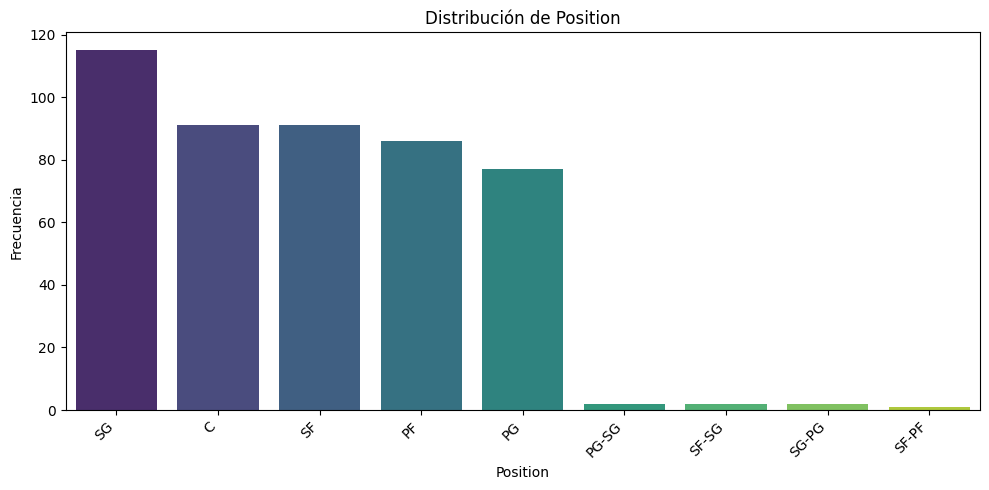

/tmp/ipython-input-2509925776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


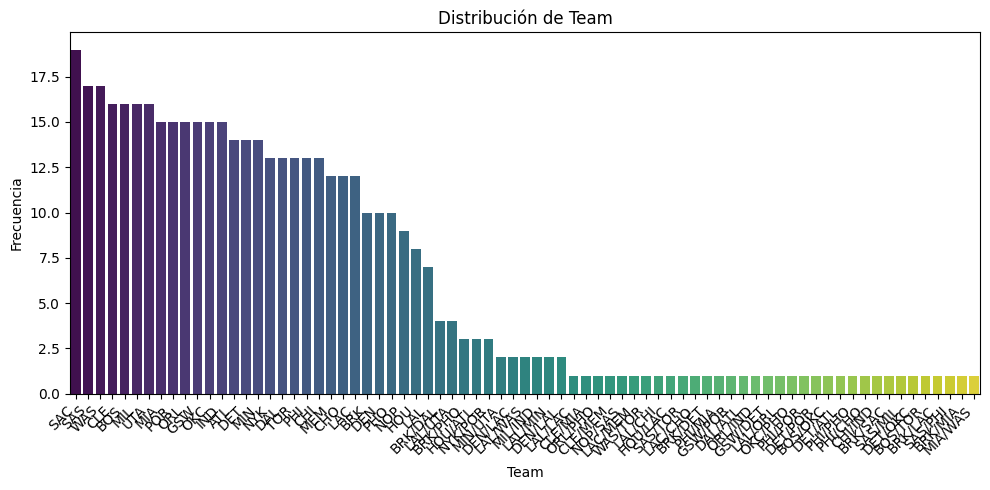

/tmp/ipython-input-2509925776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


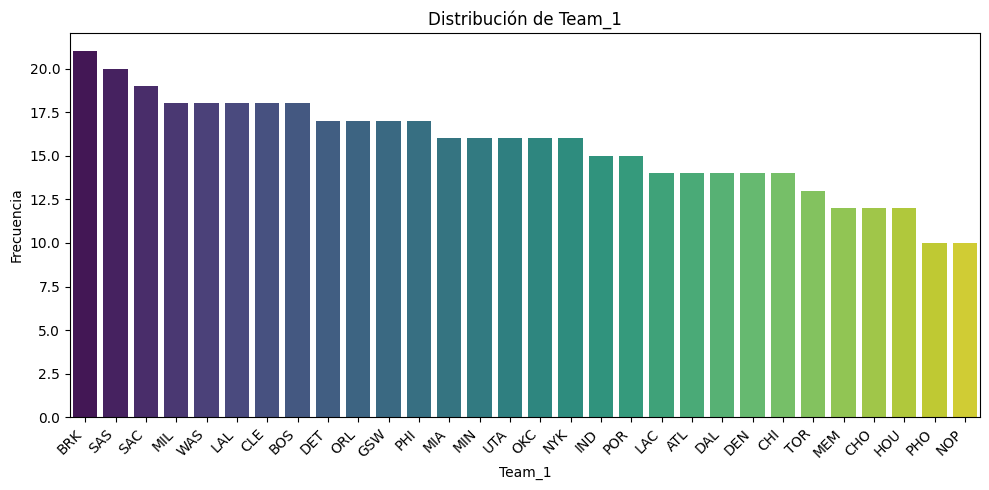

/tmp/ipython-input-2509925776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


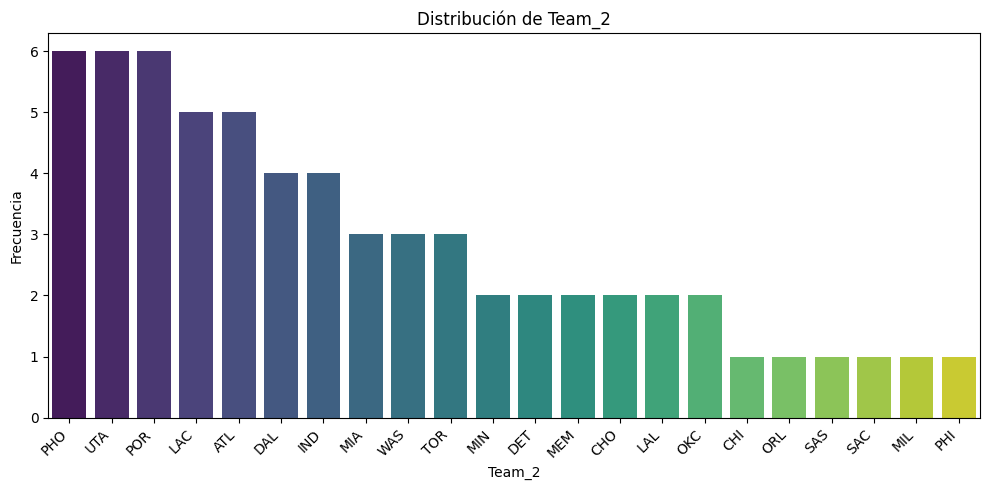

In [19]:
exclude = ['Player Name']
cat_cols = [col for col in cat_cols if col not in exclude]

for col in cat_cols:
    plt.figure(figsize=(10,5))
    order = df[col].value_counts().index  # ordenar de mayor a menor frecuencia
    sns.countplot(data=df, x=col, order=order, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

- Vemos en el barplot de Team 1 que la mayoría de equipos empizan con entre 15 y 18 jugadores con algunas excepciones que empiezan con más como BRK o SAS Y otras que empiezan con menos.
- El barplot de Team 2 refleja a los jugadores que cambiaron de equipo durante la temporada. Aquí vemos que PHO, UTA y POR fueron los equipos que más jugadores recibieron en traspasos, lo que puede ser un indicio de movimientos importantes en sus plantillas.
- Para Position, la distribución muestra un equilibrio entre posiciones principales (SG, C, SF, PF, PG), con SG como la más común (más o menos un 25%). Las posiciones híbridas (PG-SG, SF-SG, etc.) son muy poco frecuentes.

## Estadísticas por posiciones

/tmp/ipython-input-351461143.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Position", y=col, palette="Set3")
/tmp/ipython-input-351461143.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Position", y=col, palette="Set3")
/tmp/ipython-input-351461143.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Position", y=col, palette="Set3")
/tmp/ipython-input-351461143.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

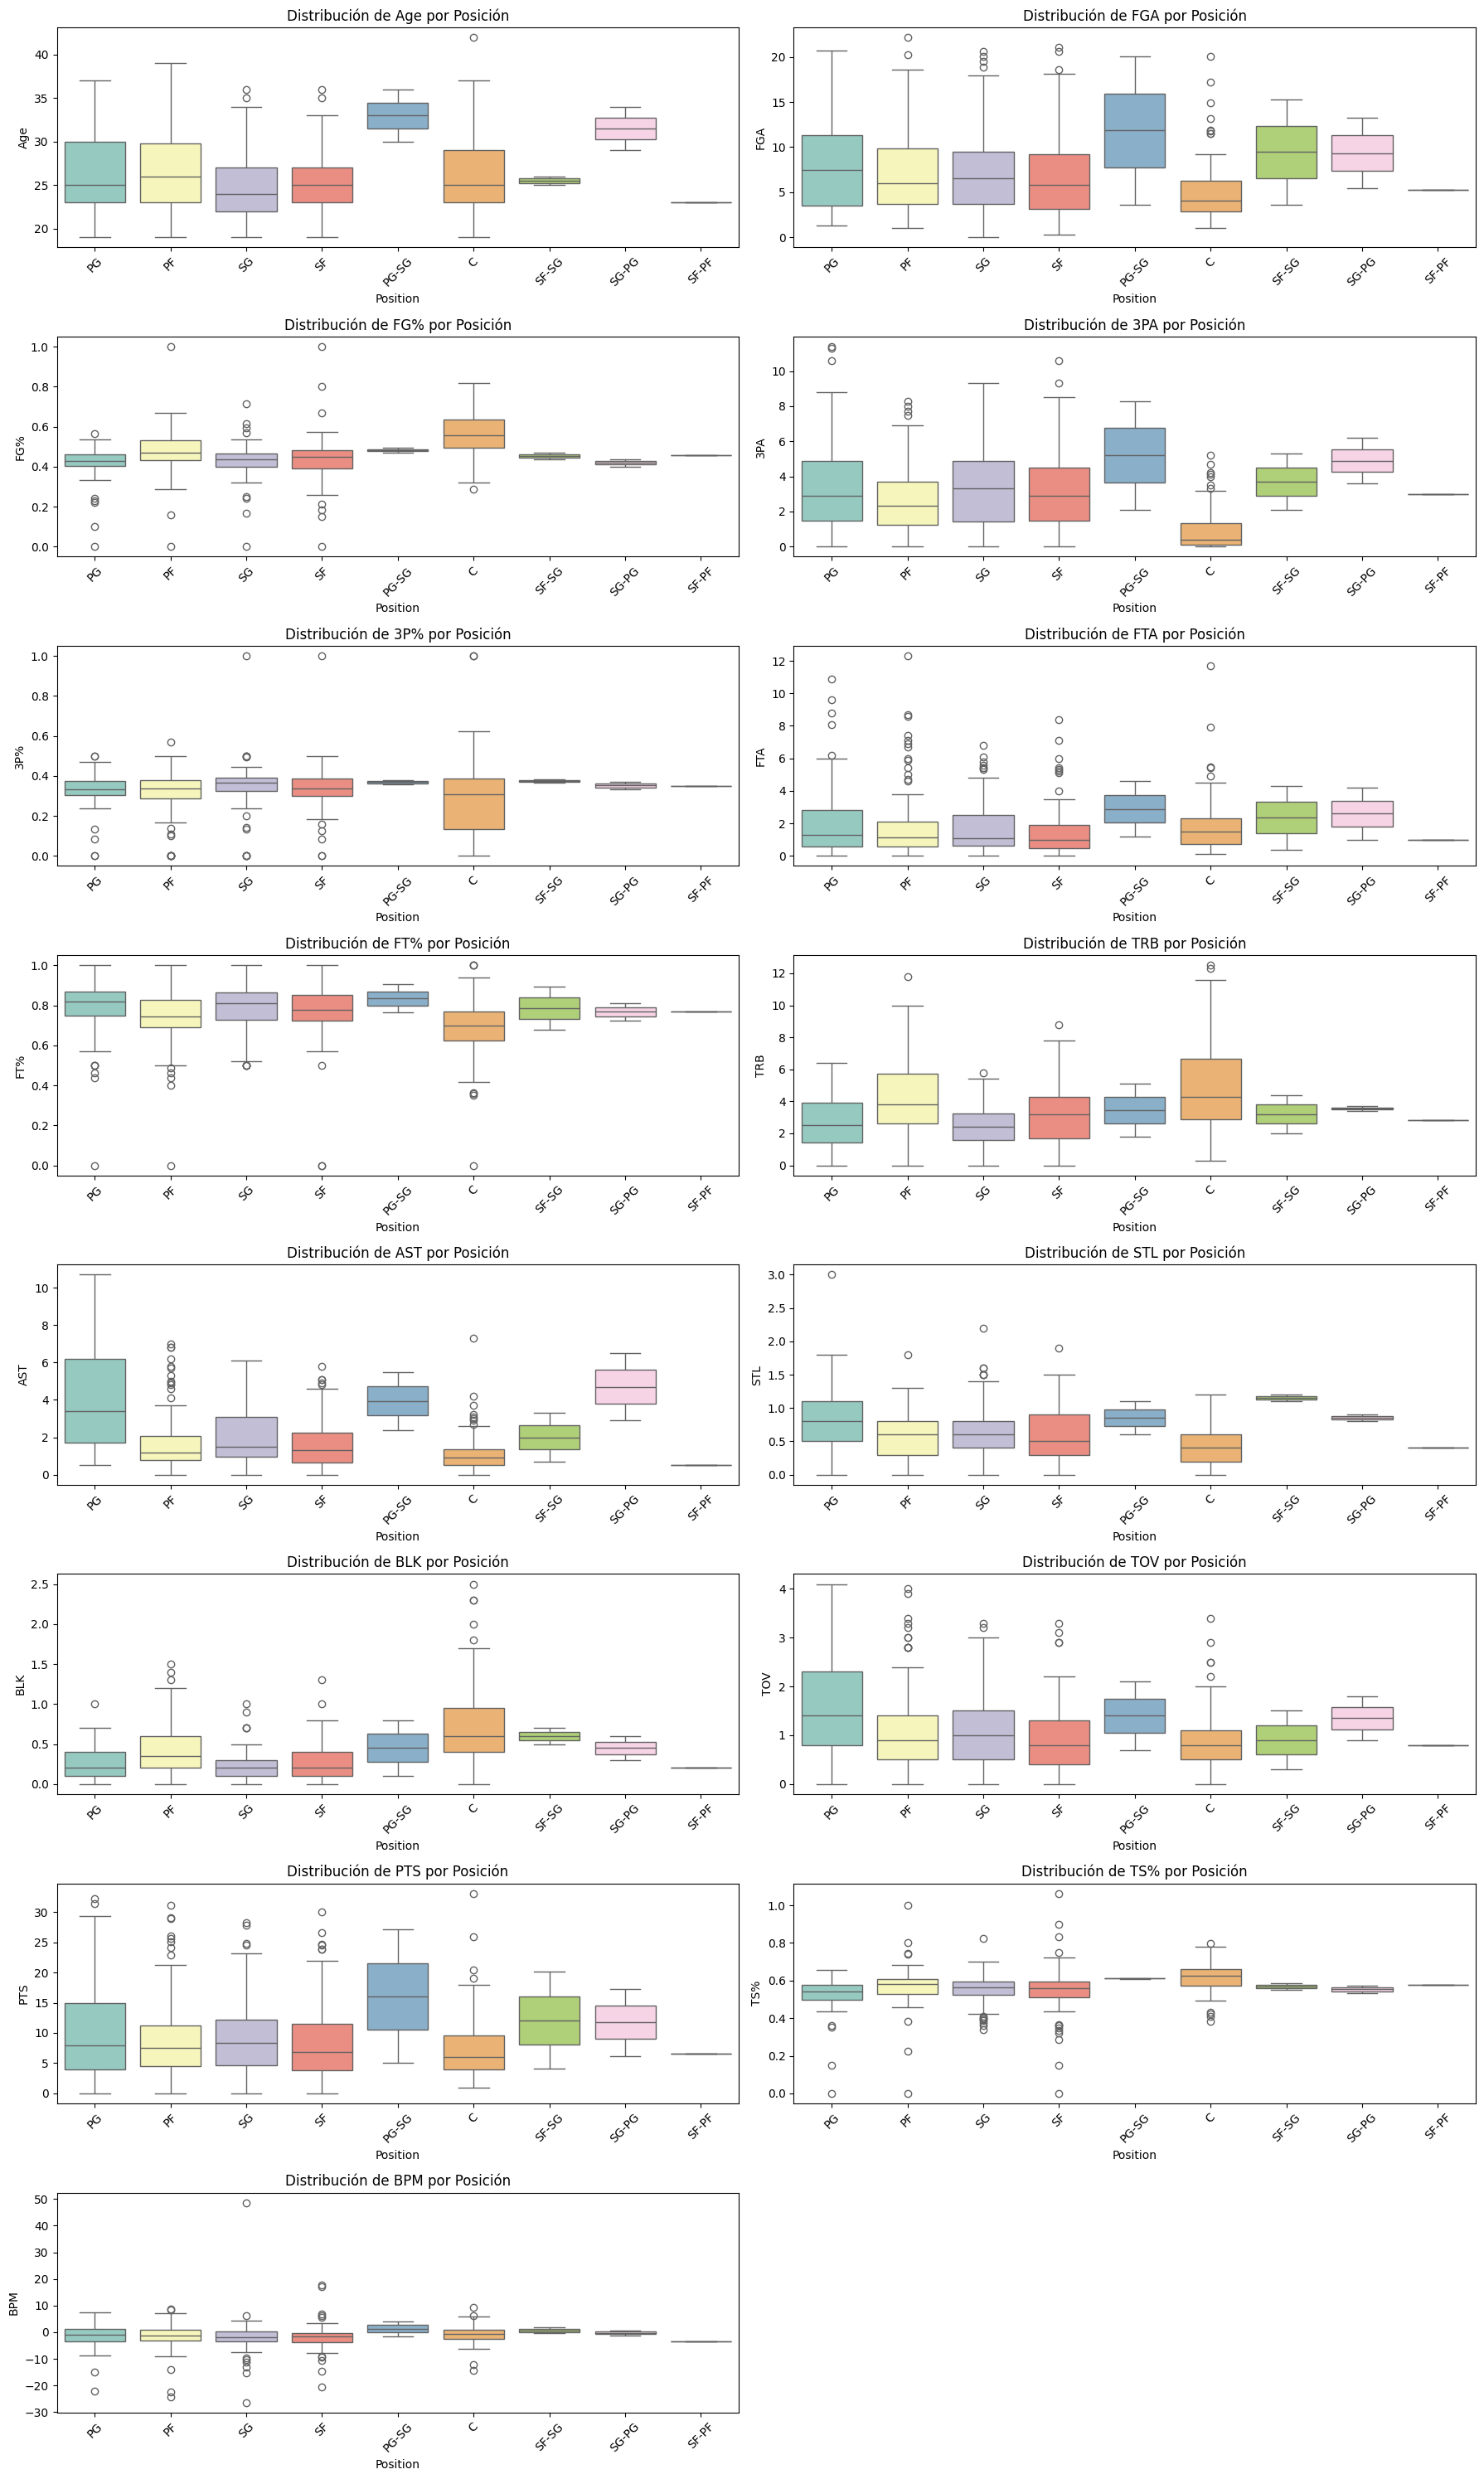

In [20]:
vars_box = [
    "Age", "FGA", "FG%", "3PA", "3P%", "FTA", "FT%",
    "TRB", "AST", "STL", "BLK", "TOV", "PTS", "TS%", "BPM"
]

plt.figure(figsize=(18, 30))

for i, col in enumerate(vars_box, 1):
    plt.subplot(len(vars_box) // 2 + len(vars_box) % 2, 2, i)
    sns.boxplot(data=df, x="Position", y=col, palette="Set3")
    plt.title(f"Distribución de {col} por Posición", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Nos centraremos solo en las 5 posiciones principales, ya que en las posiciones mixtas casi no hay jugadores y están distorsionadas. De los boxplots podemos sacar las siguientes conclusiones:

- Vemos que las estadísticas donde importa el tamaño como TRB o BLK dominan los Centers ya que suelen los jugadores más altos.
- Los Centers también suelen ser los jugadores que juegan más cerca del aro, esto lo podemos ver representado ya que son los que mayor porcentaje de tiro tienen y los que menos intentos de 3 realizan.
- Eliminado a los Centers, las otros 4 posiciones tienen estadísticas similares en intentos de 3, porcentaje de 3, intentos y porcentajes de tiros libres o BPM. Es decir, en términos de tipos de tiros y puntos, exceptuando a los Centers, el resto de posiciones no varían mucho.
- Por último, podemos ver la tendencia de que los PG sean los jugadores que dirigen el juego ya que son los que tienen mayores valores en asistencias y pérdidas. También estos suelen ser los jugadores más ágiles, de ahí que sean los que más robos realizan.
- Podemos observar también que los SG y SF muestran distribuciones muy parecidas, lo cual refleja que en el baloncesto moderno estos roles son cada vez más intercambiables.
- En el caso de los PF, suelen tener un perfil intermedio entre los C y los SF, lo que se aprecia en rebotes (más que SF pero menos que C) y en intentos de 3 (más que C pero menos que SG/SF).
- Sobre la edad, se aprecia que los C y PF tienden a tener mayor mediana que los PG/SG, lo que se puede interpretar como que los jugadores interiores suelen mantener su nivel competitivo más años, mientras que los exteriores dependen más de la velocidad y agilidad.

## Relación salario rendimiento.
Para ello dividiremos en 7 rangos los diferentes salarios:
- +41.5M -> Supermax.
- 34M-41.5M -> Max.
- 28M-34MM -> Max_novato.
- 20M-28M -> Muy bueno.
- 10M-20M -> Bueno.
- 5M-10M ->Mid_level.
- -5M -> Mínimo.

In [21]:

conditions = [
    df['Salary'] >= 41500000,
    (df['Salary'] >= 34000000) & (df['Salary'] < 41500000),
    (df['Salary'] >= 28000000) & (df['Salary'] < 34000000),
    (df['Salary'] >= 20000000) & (df['Salary'] < 28000000),
    (df['Salary'] >= 10000000) & (df['Salary'] < 20000000),
    (df['Salary'] >= 5000000)  & (df['Salary'] < 10000000),
    df['Salary'] <= 5000000
]

labels = [
    "supermax",
    "max",
    "max_novato",
    "muy_bueno",
    "bueno",
    "mid_level",
    "mínimo"
]

df['Salary_Level'] = np.select(conditions, labels, default="indefinido").astype(str)
print(df[['Salary', 'Salary_Level']].head(10))


     Salary Salary_Level
0  48070014     supermax
1  47345760     supermax
2  47080179     supermax
3  44474988     supermax
4  44119845     supermax
5  43279250     supermax
6  42492492     supermax
7  42492492     supermax
8  42492492     supermax
9  42492492     supermax


/tmp/ipython-input-1171721246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Salary_Level', order=df['Salary_Level'].value_counts().index, palette="viridis")


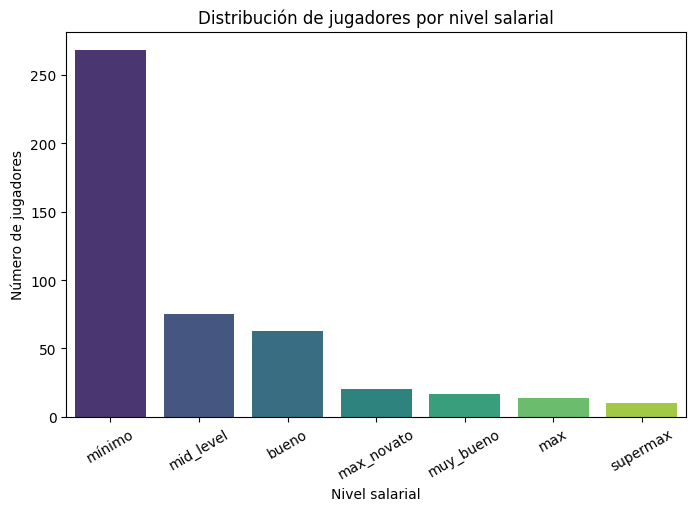

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Salary_Level', order=df['Salary_Level'].value_counts().index, palette="viridis")

plt.title("Distribución de jugadores por nivel salarial")
plt.xlabel("Nivel salarial")
plt.ylabel("Número de jugadores")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-305582815.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Salary_Level", y=col, palette="Set3")
/tmp/ipython-input-305582815.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Salary_Level", y=col, palette="Set3")
/tmp/ipython-input-305582815.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Salary_Level", y=col, palette="Set3")
/tmp/ipython-input-305582815.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

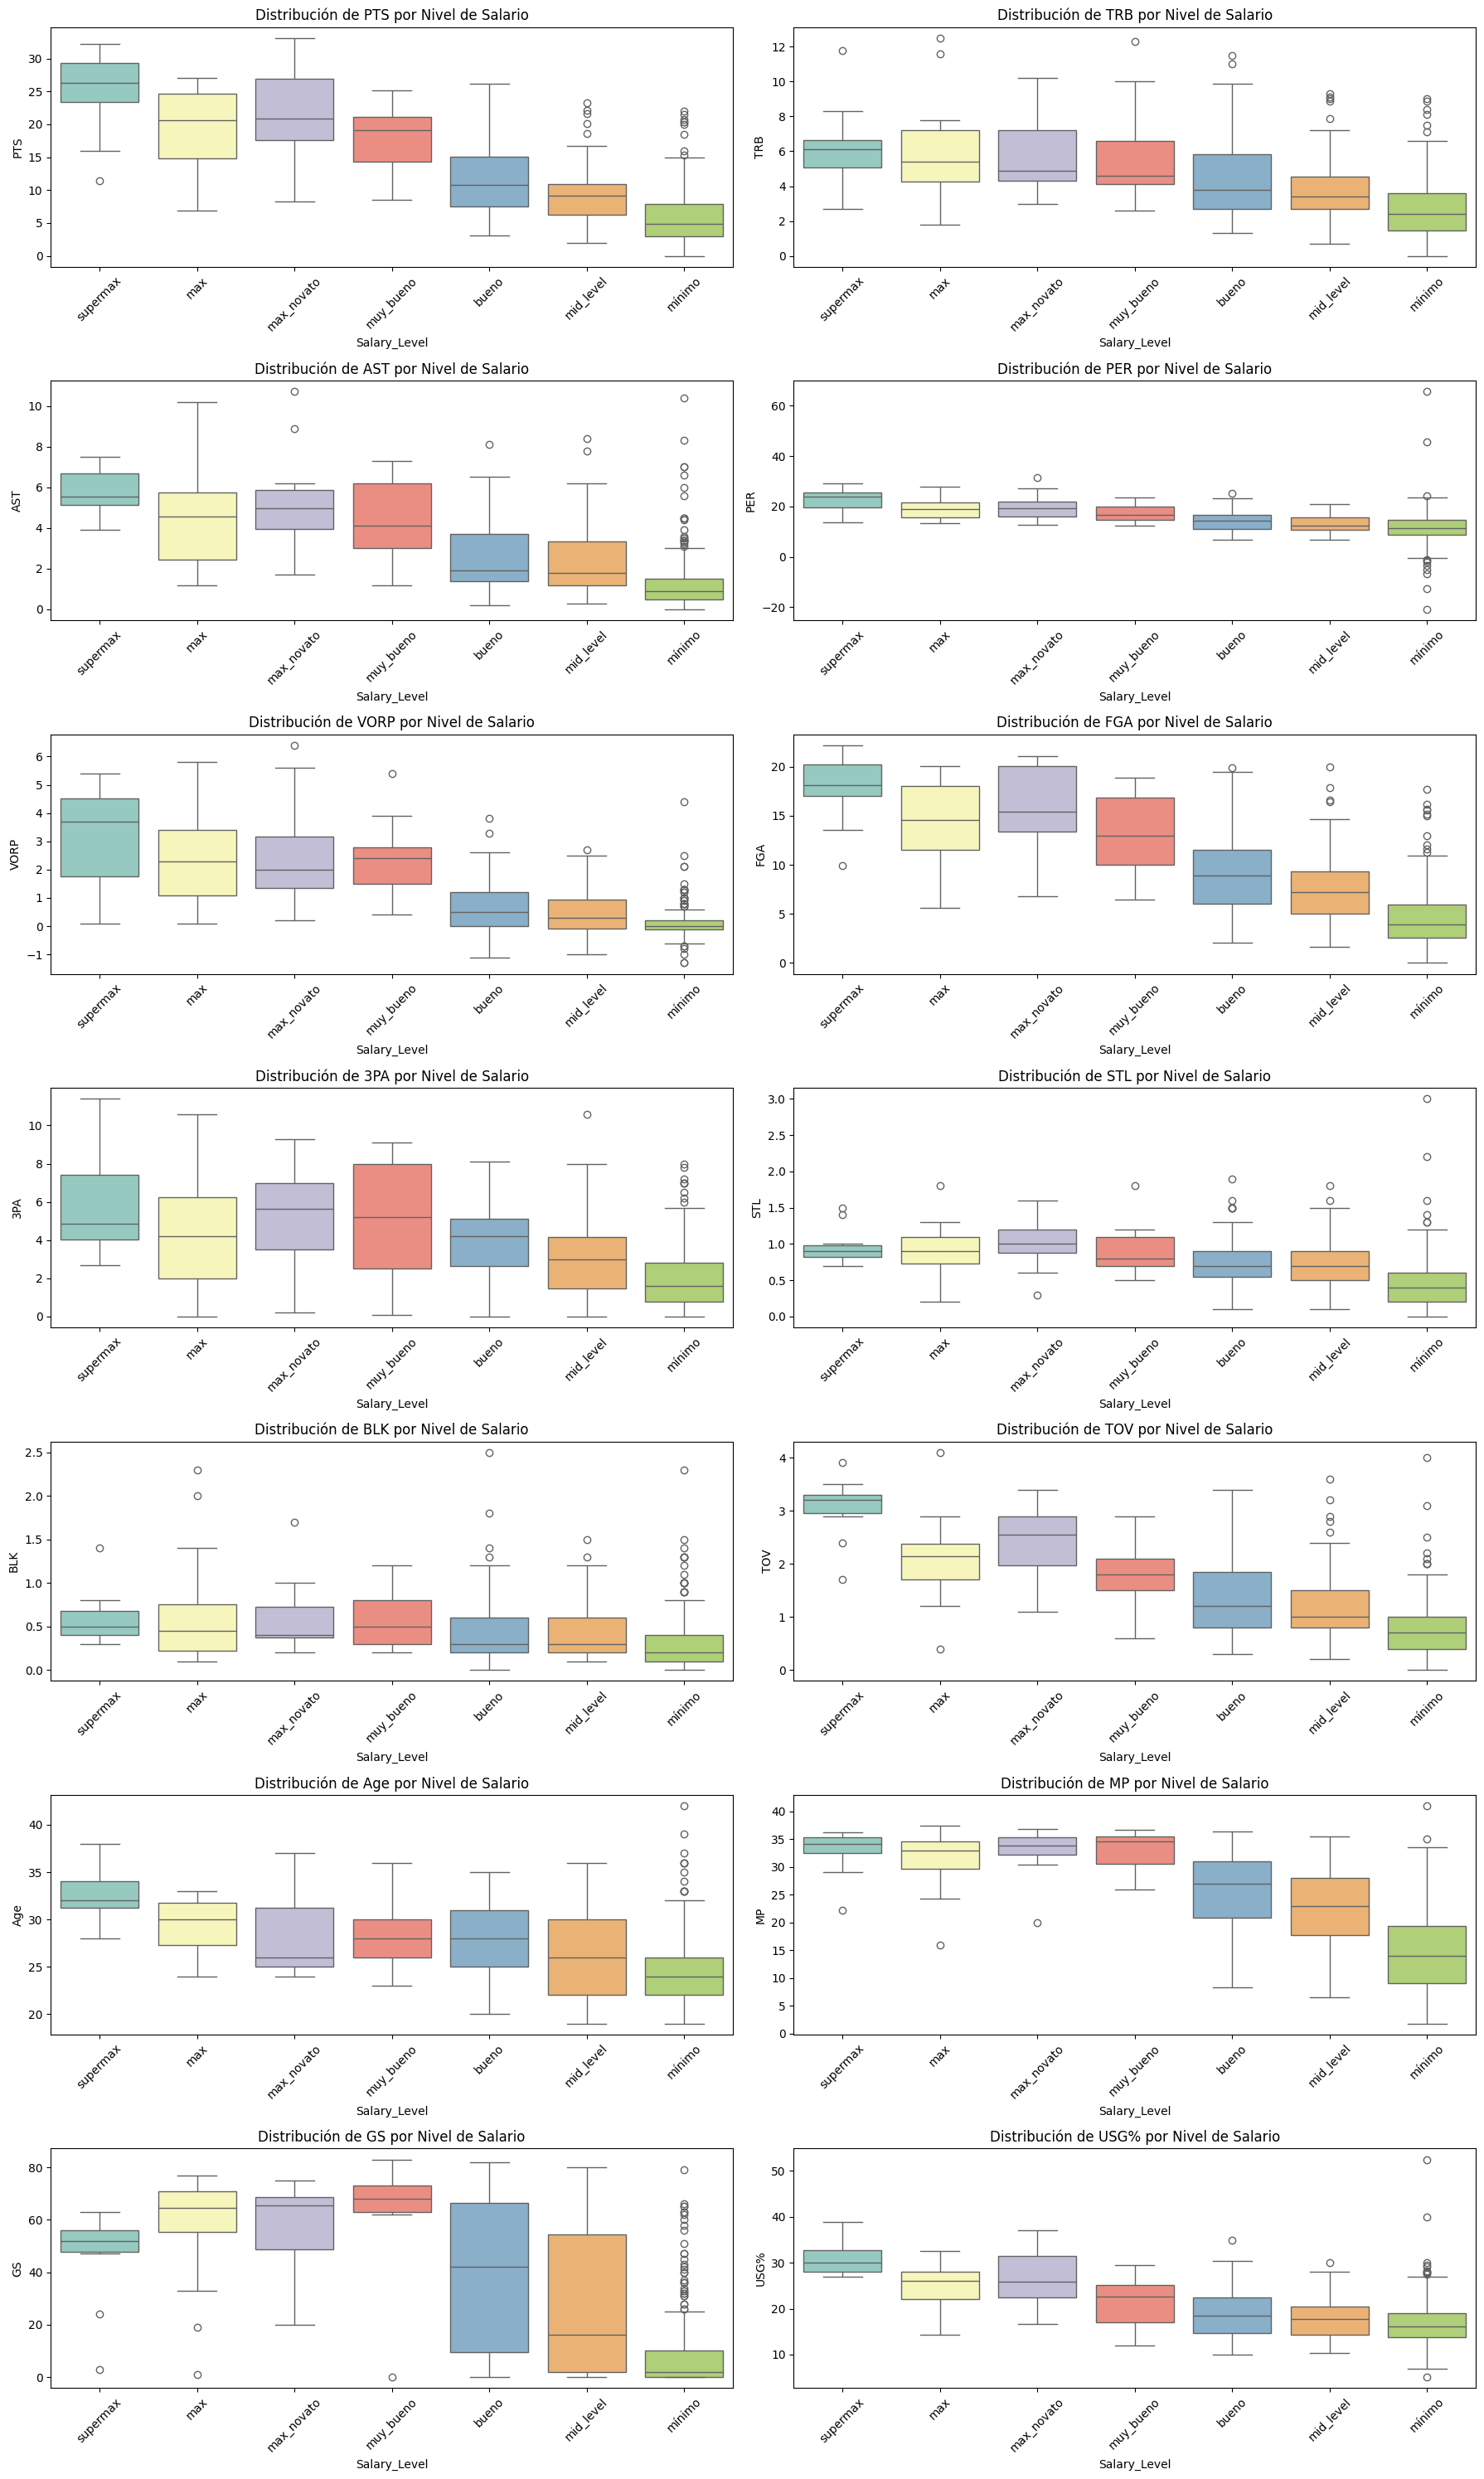

In [23]:
vars_box = ["PTS", "TRB", "AST", "PER", "VORP",
                "FGA", "3PA", "STL", "BLK", "TOV", "Age", "MP", "GS", "USG%"]
plt.figure(figsize=(18, 30))

for i, col in enumerate(vars_box, 1):
    plt.subplot(len(vars_box) // 2 + len(vars_box) % 2, 2, i)
    sns.boxplot(data=df, x="Salary_Level", y=col, palette="Set3")
    plt.title(f"Distribución de {col} por Nivel de Salario", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

          Salary       PTS       TRB       AST       PER        WS      VORP       FGA       3PA       STL       BLK       TOV       TS%       Age
Salary  1.000000  0.727597  0.503633  0.593971  0.411790  0.624664  0.680339  0.706393  0.491569  0.449517  0.301344  0.646808  0.160168  0.416072
PTS     0.727597  1.000000  0.618264  0.732933  0.557184  0.737074  0.756909  0.982185  0.714349  0.572364  0.305571  0.860030  0.265973  0.102828
TRB     0.503633  0.618264  1.000000  0.390380  0.498250  0.708982  0.601407  0.569441  0.192899  0.397631  0.660703  0.587519  0.304129  0.072424
AST     0.593971  0.732933  0.390380  1.000000  0.365579  0.540000  0.623141  0.756695  0.584398  0.663578  0.083562  0.826558  0.072570  0.170663
PER     0.411790  0.557184  0.498250  0.365579  1.000000  0.551584  0.575725  0.476101  0.195733  0.349036  0.416784  0.391747  0.583811  0.073592
WS      0.624664  0.737074  0.708982  0.540000  0.551584  1.000000  0.892780  0.659489  0.369109  0.515507  0.490743  

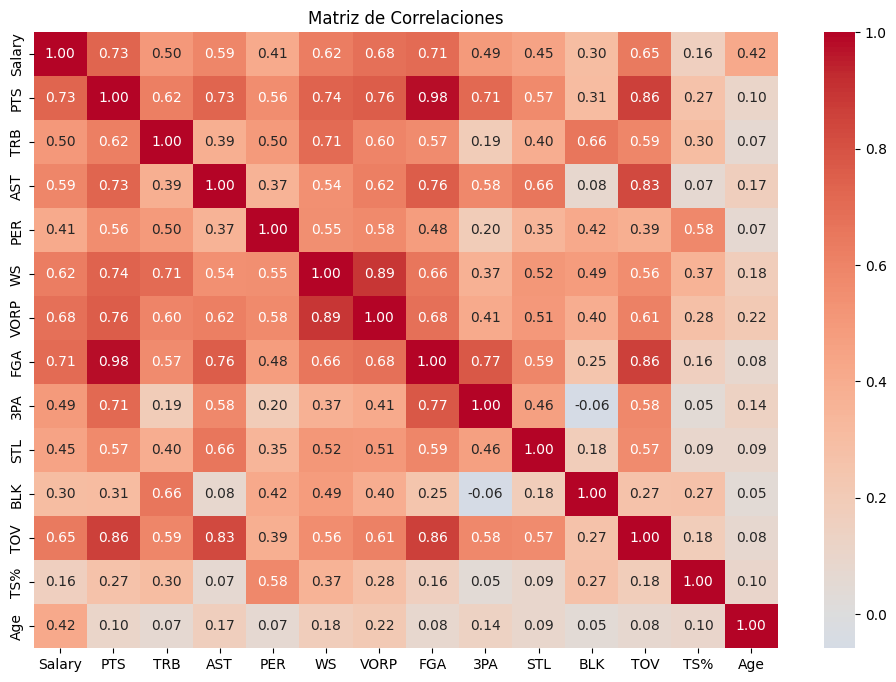

In [24]:
corr_vars = ["Salary", "PTS", "TRB", "AST", "PER", "WS", "VORP",
             "FGA", "3PA", "STL", "BLK", "TOV", "TS%", "Age"]

corr_matrix = df[corr_vars].corr()
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlaciones")
plt.show()

Podemos extraer las siguientes conclusiones:
- Como era de esperar los jugadores que más cobran (supermax) lideran las estadísticas más importantes como puntos, PER o tiros intentados.
- Observamos como en estadísticas defensivas como robos y tapones no lideran los supermax ya que en general, losjugadores que más cobran suelen ser estrellas ofensivas y suelen tener más carencias en defensa.
- En asitencias y rebotes también suelen liderar los jugadores que más cobran en general.
- Es a destacar que en muchas de estas estadísticas suelen ser mejores jugadores con max_novato que con el máximo, debido a los límites de la NBA hay jugadores muy buenos que no pueden cobrar más por su edad, esto explica que haya muy buenos jugadores, mejores incluso que los de máximo, en la categoría de max_novato.
- Los jugadores que más tiros de 3 intentan son los de max_novato y los de muy bueno, es decir, los jugadores nuevos ya que es la tendencia y los jugadores de rol mejor pagados.
- En el tema de la edad es interesante ver los contratos altos suelen coincidir con jugadores en su prime (25-30 años). Los de salario mínimo muestran alta variabilidad porque hay tanto jóvenes en sus primeros contratos como veteranos en el ocaso de su carrera.
- En cuanto a tiempo y partidos jugados vemos, que las 4 primeras categorías son las que más minutos acaparan, como era de esperar, los jugadores que menos cobran son los que menos minutos juegan o casi ni participan. Por otro lado, es interesante ver que los jugadores que más partidos empiezan son los de max, max_novato y muy_bueno,no es el caso de los supermax ya que los equipos buscan darle el mayor descanso posible a las superestrellas.
- De la matriz de correlaciones vemos que las variables más relacionados con el salario son los puntos y los tiros de 3, como ya hemos dicho, aquellos jugadores que destacan ofensivamente son los que más llegan a cobrar.
- También vemos relaciones que eran de esperar como que los jugadores que mástiran son los que más puntos meten o los que más asistencias dan son los que mas balones pierden.
- Aunque los supermax dominan en PTS y FGA, variables de eficiencia como TS% o eFG% no parecen tener correlaciones tan altas con el salario. Esto refleja que la liga premia más la capacidad ofensiva bruta (volumen) que la eficiencia.
- En la matriz de correlaciones observamos que las variables defensivas como STL o BLK tienen una correlación más baja con el salario que las ofensivas. Esto puede interpretarse como que la NBA tiende a pagar más por lo que genera espectáculo y puntos que por el trabajo defensivo.
- PER, WS y VORP sí correlacionan con el salario, pero no tanto como los puntos. Esto refuerza la idea de que aunque las métricas avanzadas capturan mejor el impacto global del jugador, el mercado NBA sigue guiándose mucho por estadísticas más visibles.

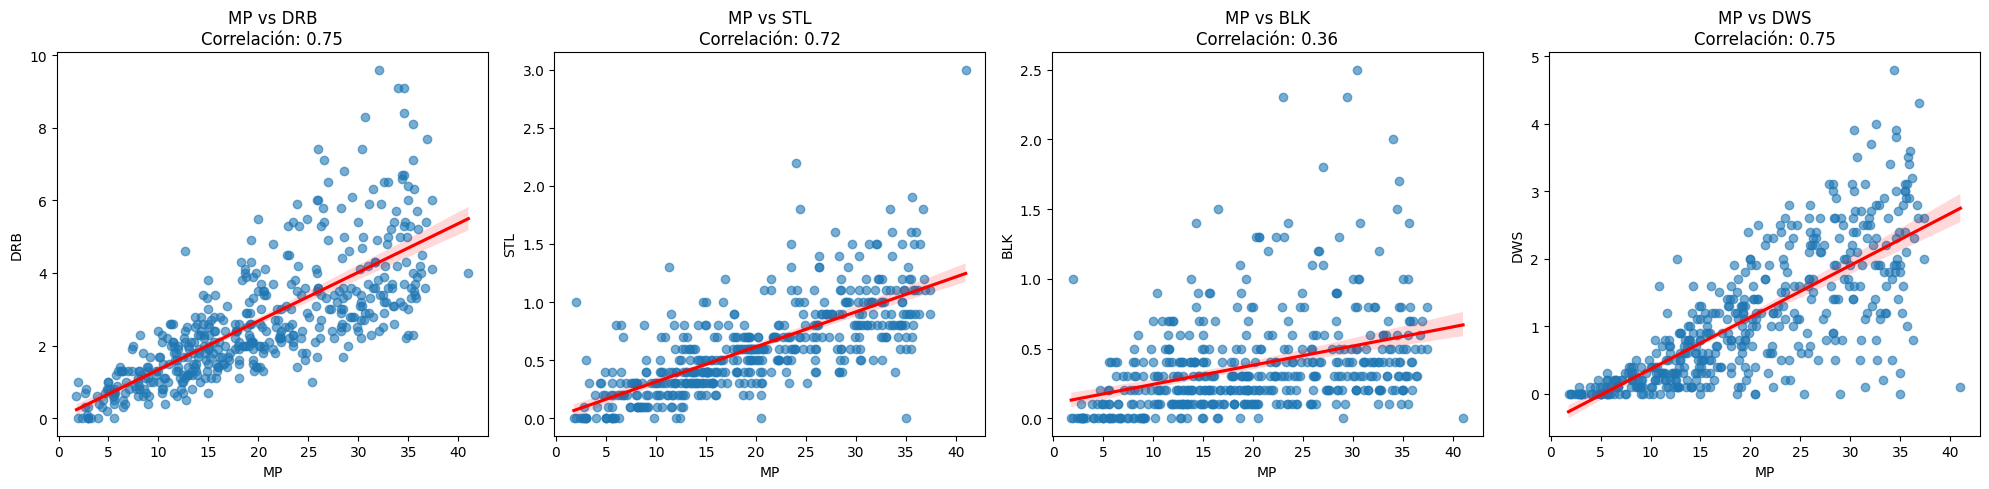

In [25]:
comparisons = [
    ("MP", "DRB"),
    ("MP", "STL"),
    ("MP", "BLK"),
    ("MP", "DWS")
]

plt.figure(figsize=(20, 5))

for i, (x_var, y_var) in enumerate(comparisons, 1):
    plt.subplot(1, 4, i)

    sns.regplot(data=df, x=x_var, y=y_var, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

    corr, p_val = pearsonr(df[x_var].dropna(), df[y_var].dropna())

    plt.title(f"{x_var} vs {y_var}\nCorrelación: {corr:.2f}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1305970702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_means.index, y=team_means[col], order=order, palette="viridis")
/tmp/ipython-input-1305970702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_means.index, y=team_means[col], order=order, palette="viridis")
/tmp/ipython-input-1305970702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_means.index, y=team_means[col], order=order, palette="viridis")
/tmp/ipython-input-1305970702.py:11: FutureWarning: 

Passing `palette` without assig

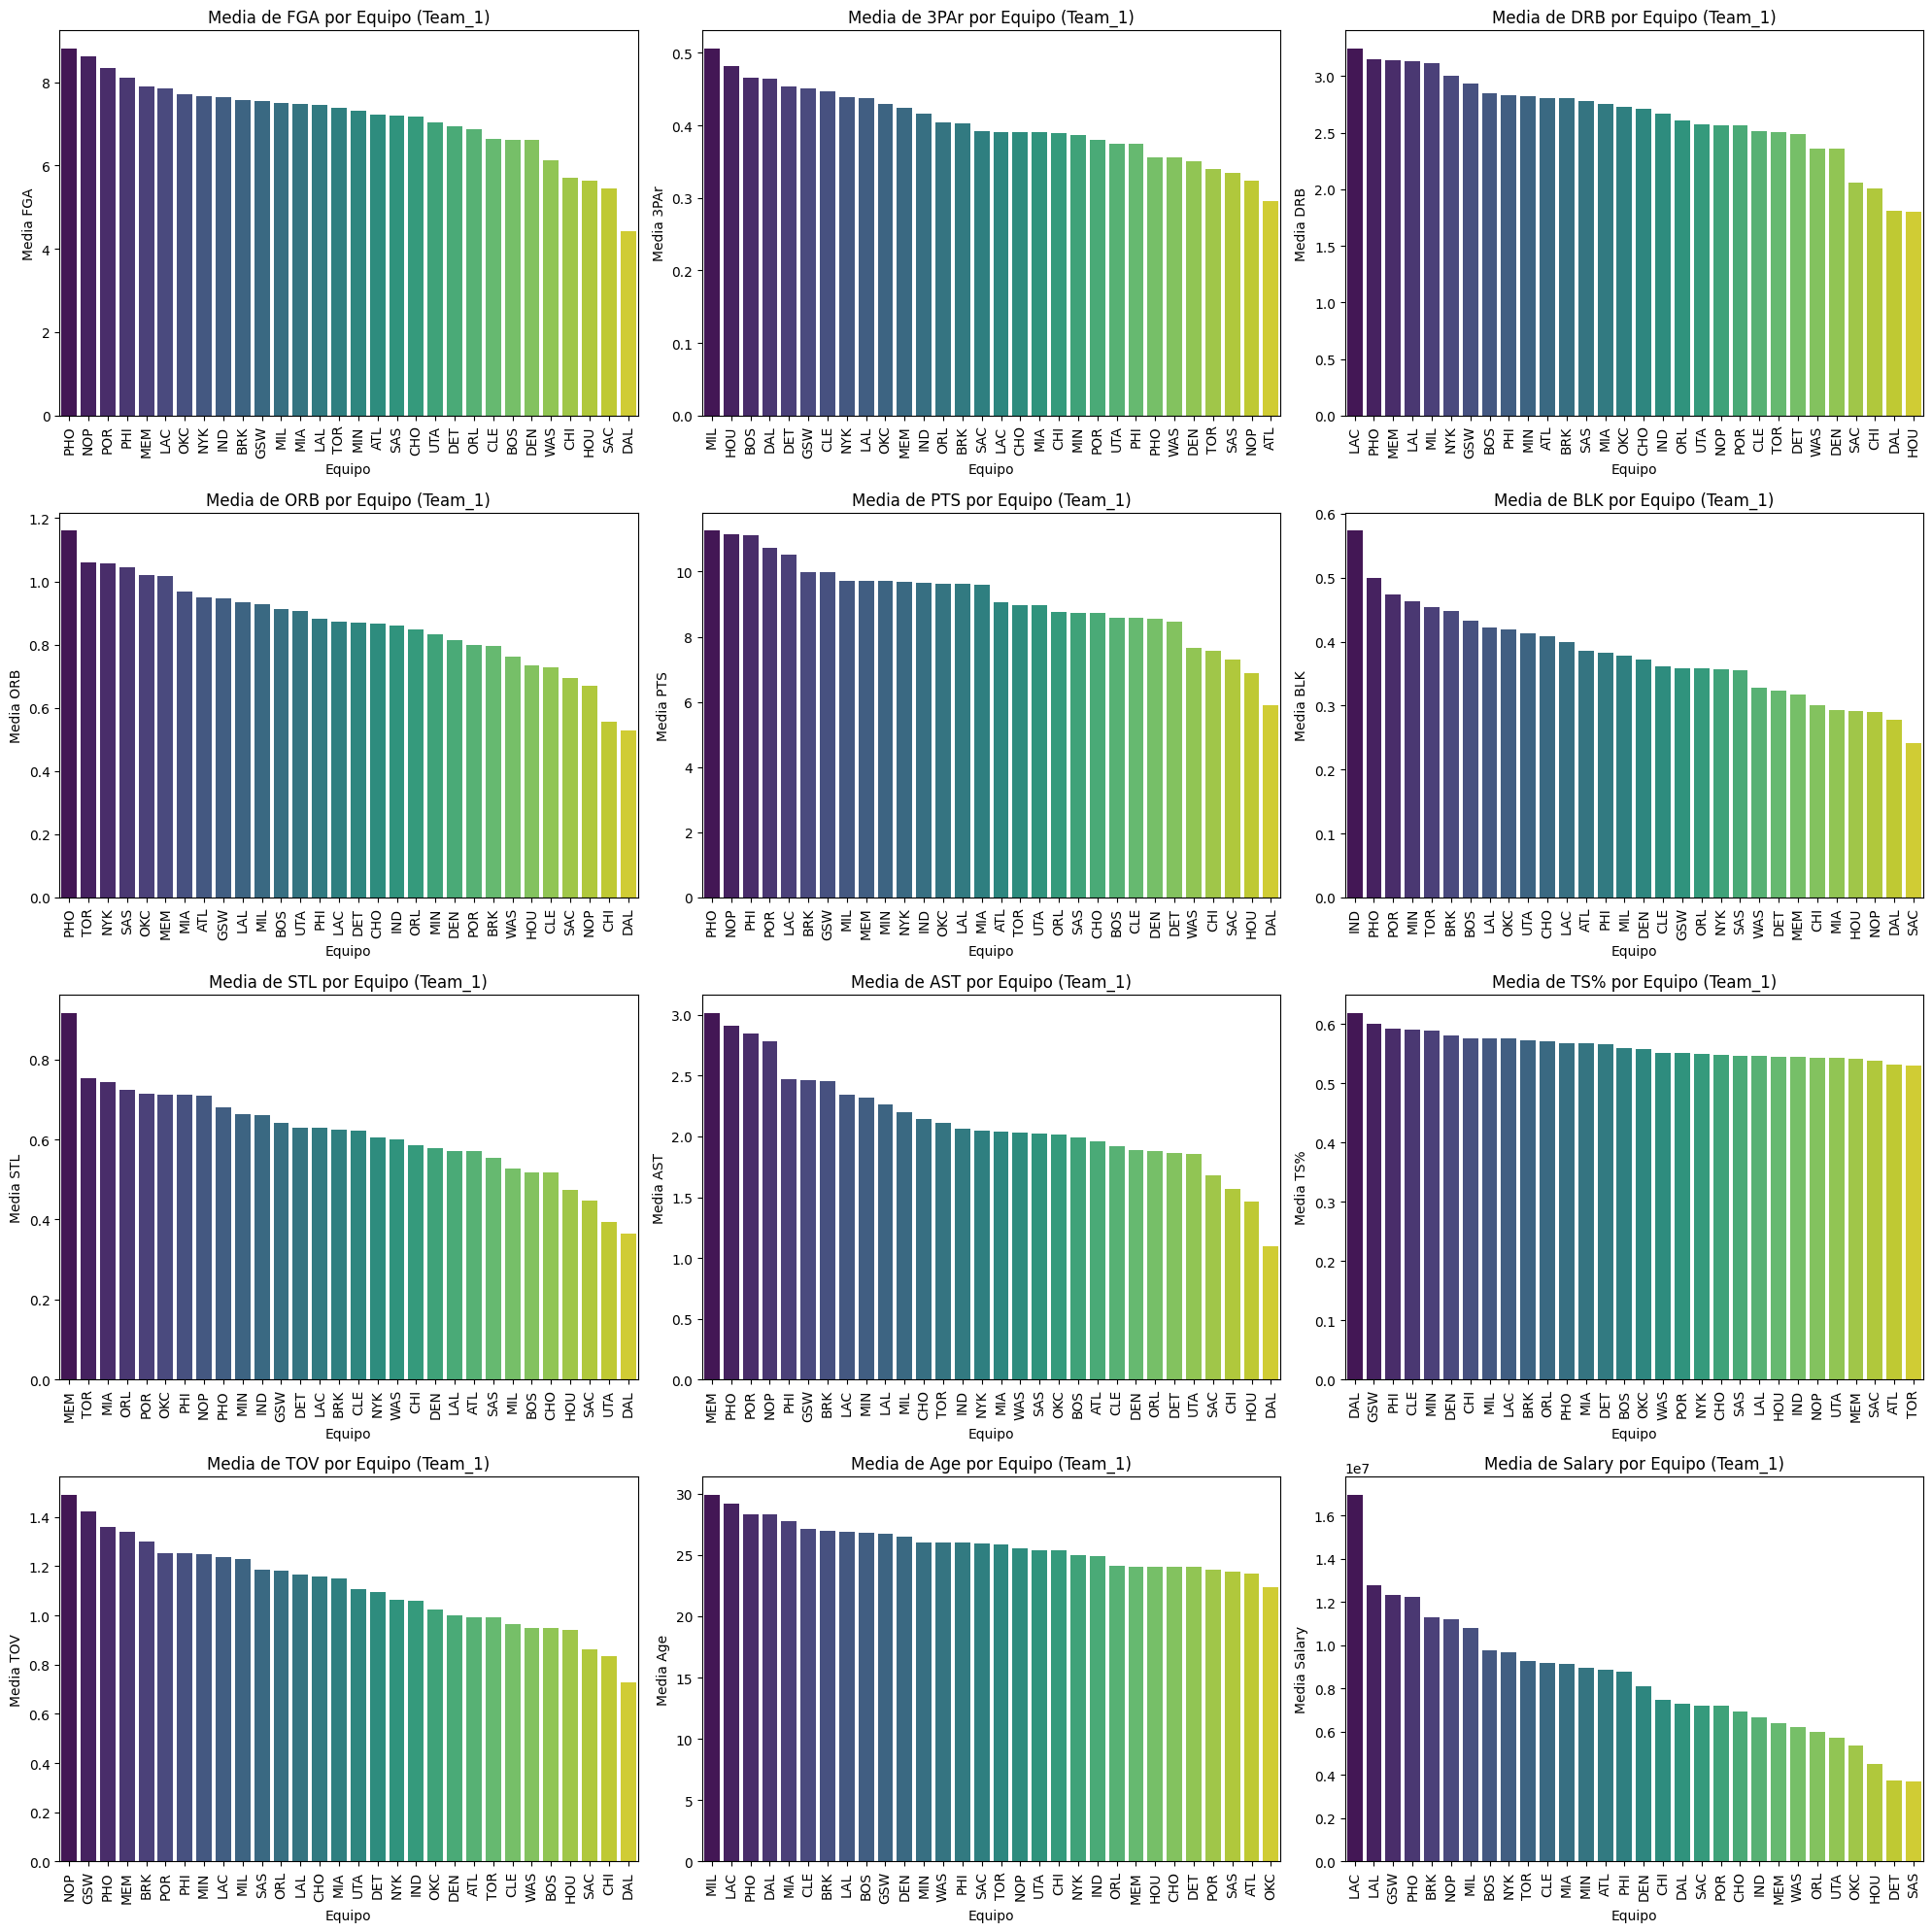

In [26]:
vars_to_plot = ["FGA","3PAr", "DRB" ,"ORB", "PTS", "BLK", "STL", "AST", "TS%", "TOV", "Age", "Salary"]

team_means = df.groupby("Team_1")[vars_to_plot].mean()

plt.figure(figsize=(20, 20))

for i, col in enumerate(vars_to_plot, 1):
    plt.subplot(4, 3, i)
    order = team_means[col].sort_values(ascending=False).index

    sns.barplot(x=team_means.index, y=team_means[col], order=order, palette="viridis")
    plt.title(f"Media de {col} por Equipo (Team_1)")
    plt.xticks(rotation=90)
    plt.xlabel("Equipo")
    plt.ylabel(f"Media {col}")

plt.tight_layout()
plt.show()


/tmp/ipython-input-3390873834.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_means_top10.index, y=team_means_top10[col], order=order, palette="viridis")
/tmp/ipython-input-3390873834.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_means_top10.index, y=team_means_top10[col], order=order, palette="viridis")
/tmp/ipython-input-3390873834.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_means_top10.index, y=team_means_top10[col], order=order, palette="viridis")
/tmp/ipython-input-3390873834.py:14: FutureWarnin

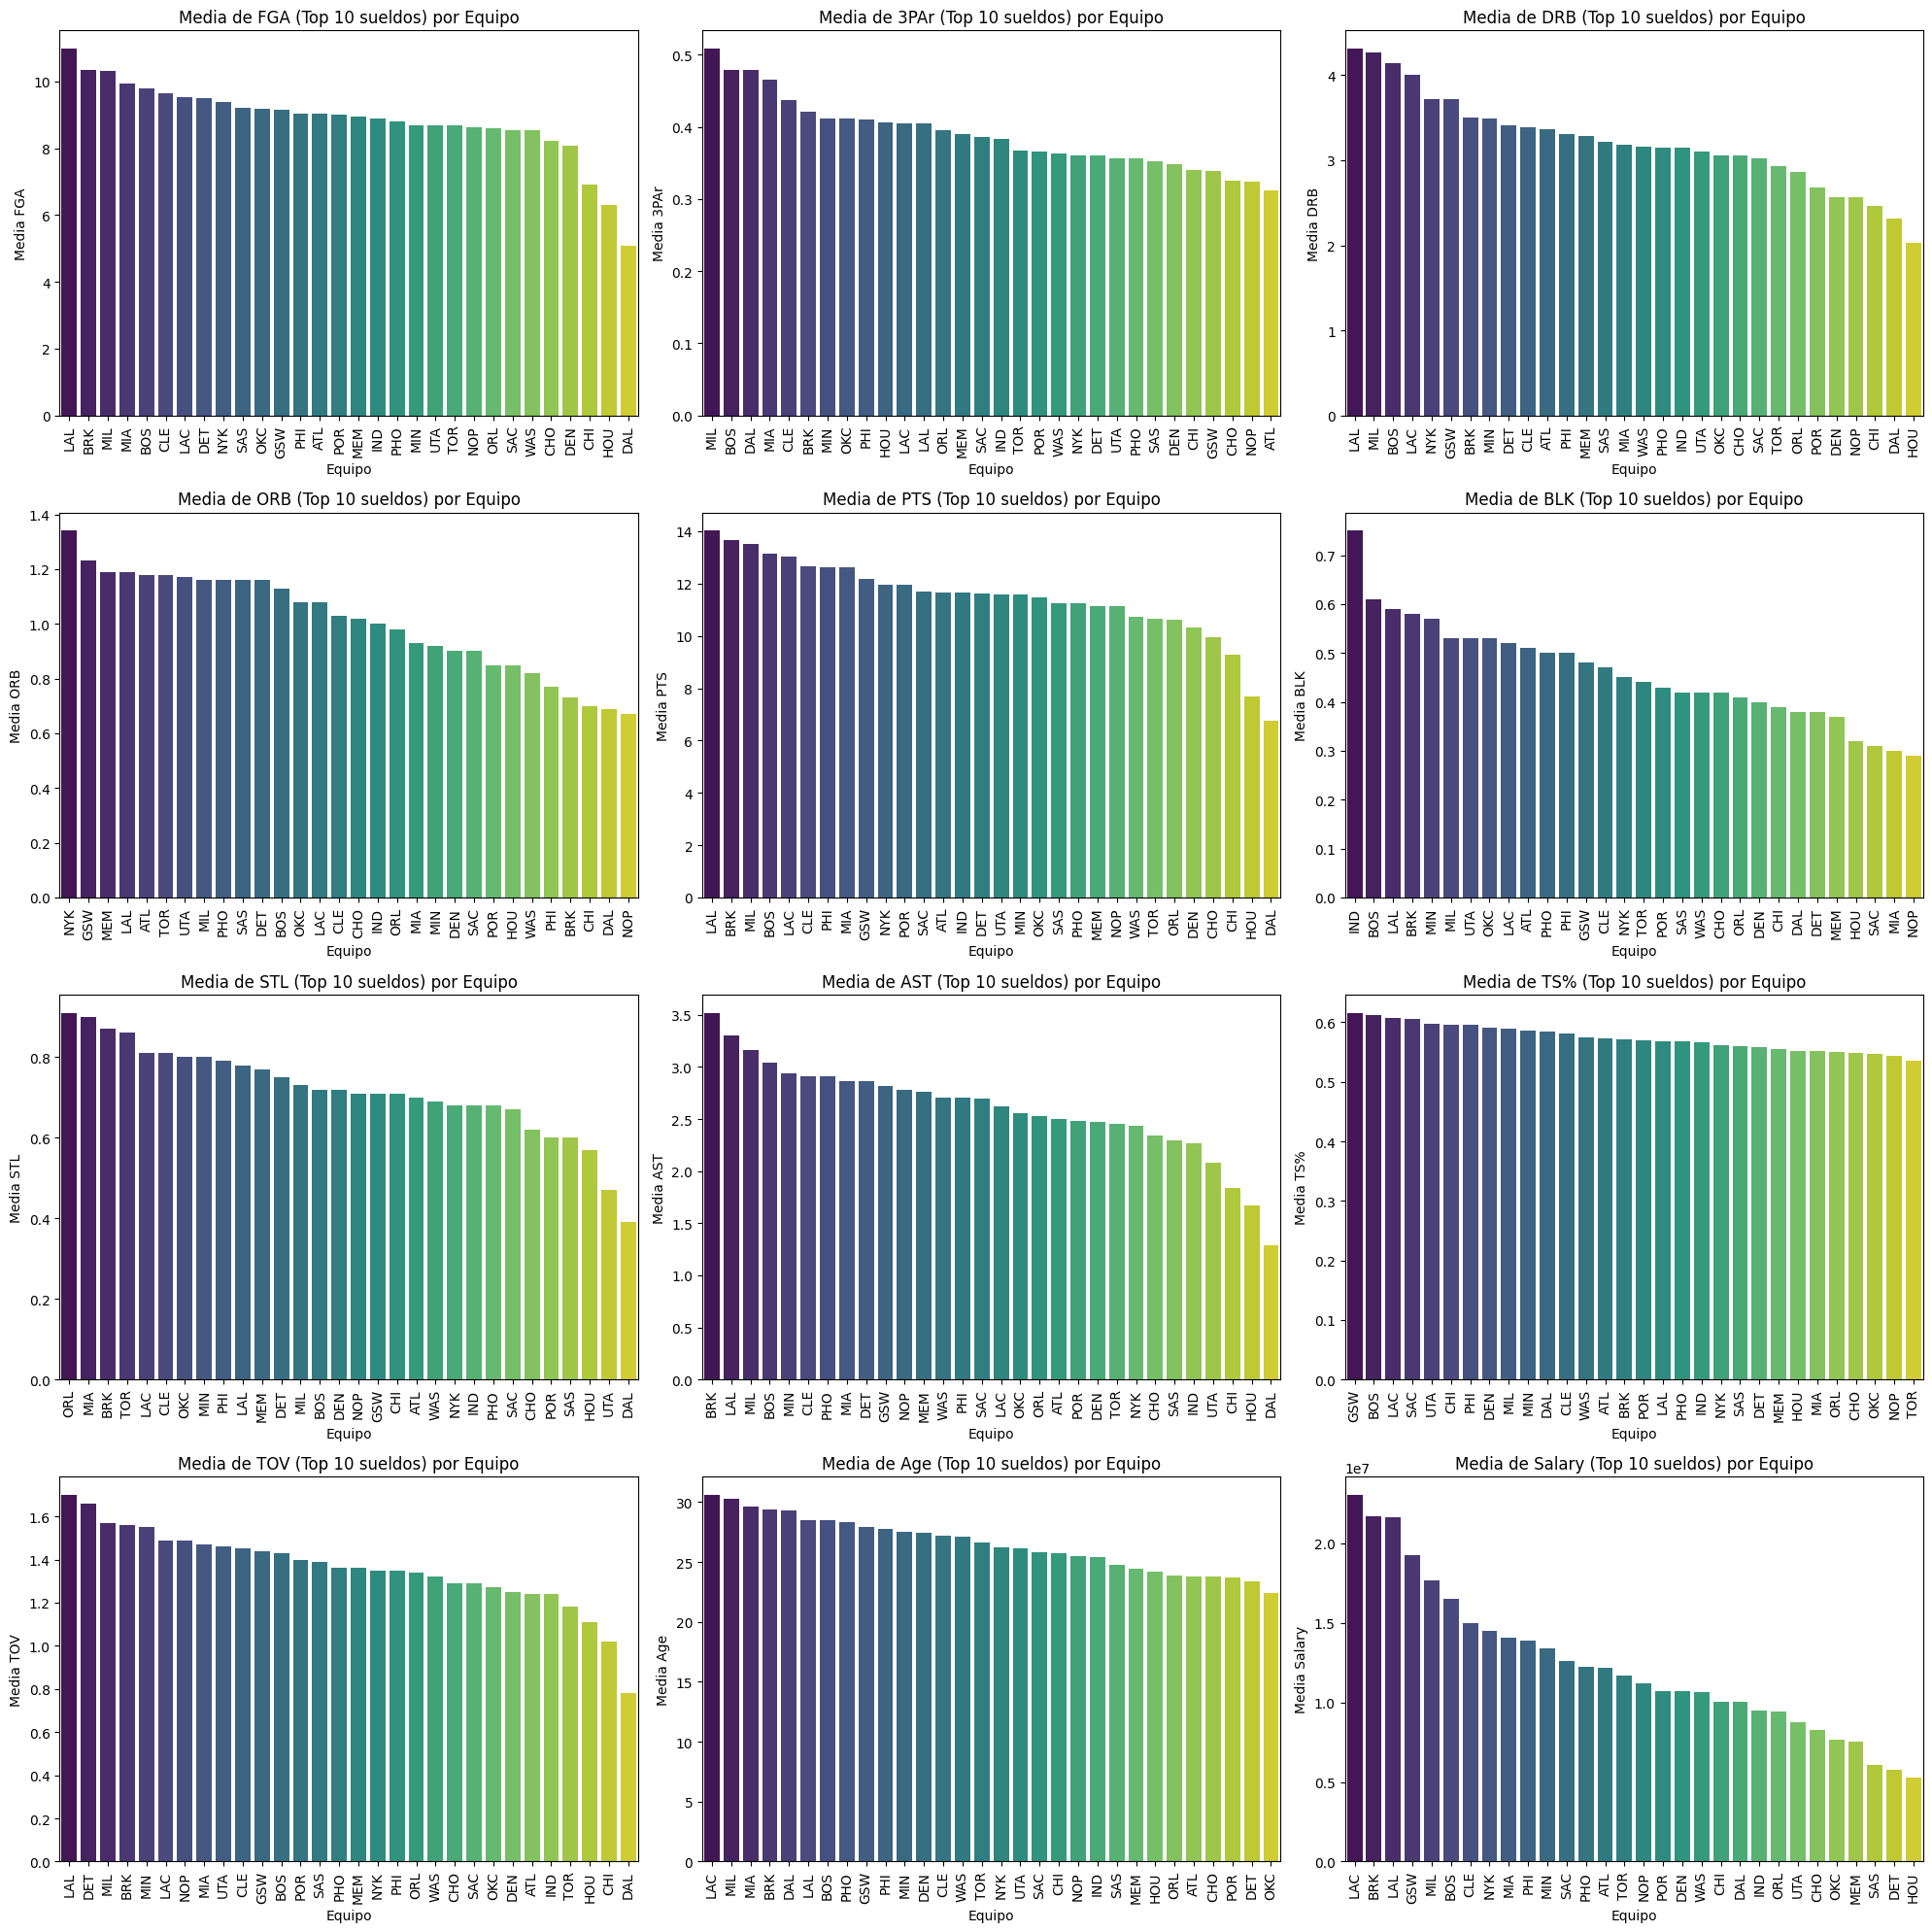

In [27]:
vars_to_plot = ["FGA","3PAr", "DRB" ,"ORB", "PTS", "BLK", "STL", "AST", "TS%", "TOV", "Age", "Salary"]
df_top10 = df.sort_values("Salary", ascending=False).groupby("Team_1").head(10)


team_means_top10 = df_top10.groupby("Team_1")[vars_to_plot].mean()


plt.figure(figsize=(20, 20))

for i, col in enumerate(vars_to_plot, 1):
    plt.subplot(4, 3, i)
    order = team_means_top10[col].sort_values(ascending=False).index

    sns.barplot(x=team_means_top10.index, y=team_means_top10[col], order=order, palette="viridis")
    plt.title(f"Media de {col} (Top 10 sueldos) por Equipo")
    plt.xticks(rotation=90)
    plt.xlabel("Equipo")
    plt.ylabel(f"Media {col}")

plt.tight_layout()
plt.show()

En esta última parte del análisis nos centramos en la comparación de equipos a nivel colectivo. Para ello, calculamos las medias de diferentes estadísticas ofensivas y defensivas por equipo (FGA, 3PAr, DRB, ORB, PTS, BLK, STL, AST, TS%, TOV, Age y Salary).

**Resultados con todos los jugadores:**

* Las medias de muchos equipos se ven penalizadas por incluir a jugadores con
pocos minutos o sin apenas participación, lo que reduce las estadísticas globales.

* Esto refleja bien la profundidad de plantilla, pero puede distorsionar las comparaciones entre equipos respecto a sus jugadores más determinantes.

**Resultados con los 10 jugadores mejor pagados:**

* Al centrarnos en los 10 contratos más altos de cada equipo, obtenemos una visión más ajustada del núcleo principal de la plantilla.

* Vemos que en la mayoría de métricas ofensivas (PTS, FGA, 3PAr, AST), los equipos que invierten más en estrellas son los que encabezan la clasificación.

* En cambio, en métricas defensivas como DRB o STL, la diferencia entre todos los jugadores y solo los mejor pagados es menor, lo que sugiere que la aportación defensiva suele estar más repartida entre titulares y jugadores de rol.

* En el caso del salary, como era de esperar, los equipos con jugadores franquicia destacan claramente, aunque también podemos observar diferencias en cómo cada equipo reparte su masa salarial.

**Conclusión general:**

* Analizar los datos de los 10 jugadores mejor pagados nos permite acercarnos más a la realidad competitiva, ya que son los que más minutos disputan y, en general, determinan los resultados del equipo.

* Comparar ambos enfoques (todos los jugadores vs top contratos) es útil para estudiar la profundidad de plantilla y cómo influye el gasto salarial en el rendimiento estadístico colectivo.